## Import Libraries

Import all necessary libraries for clustering analysis.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Clustering Libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score

# Visualization Libraries 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully")
print("Prepared for clustering analysis")

 All libraries imported successfully
 Prepared for clustering analysis


## Data Loading and Preparation

Load the football dataset and prepare it for clustering analysis.

In [ ]:
# Load the Football Dataset
print("Loading Football Player Data...")
print("="*50)

# Load data
df = pd.read_csv('../data/data_football_ratings.csv')

print("Dataset Basic Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print(f"\n First 5 rows:")
display(df.head())

print(f"\n Dataset Info:")
print(df.info())

print(f"\n🔢 Missing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
 print(missing_values[missing_values > 0])
else:
 print(" No missing values found!")

print(f"\n Numerical Columns Statistics:")
print(df.describe())

 Loading Football Player Data...
 Dataset Basic Information:
Shape: (50652, 63)
Columns: ['competition', 'date', 'match', 'team', 'pos', 'pos_role', 'player', 'rater', 'is_human', 'original_rating', 'goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked', 'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses', 'touches', 'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc', 'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w', 'aerials_l', 'poss_lost', 'fouls', 'wasfouled', 'clearances', 'stop_shots', 'interceptions', 'tackles', 'dribbled_past', 'tballs_acc', 'tballs_inacc', 'ycards', 'rcards', 'dangmistakes', 'countattack', 'offsides', 'goals_ag_otb', 'goals_ag_itb', 'saves_itb', 'saves_otb', 'saved_pen', 'missed_penalties', 'owngoals', 'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'flow_success', 'betweenness2goals', 'win', 'lost', 'is_home_team', 'minutesPlayed', 'game_duration']

 First 5 row

,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,Kicker,1,3.50,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
1,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,WhoScored,0,6.56,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
2,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,SofaScore,0,6.70,...,0.143055,0.603571,0.304348,0.000000,0.0,0,1,0,90,90
3,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,Sub,Sub,Anthony Martial,WhoScored,0,6.19,...,0.051556,0.524845,0.041096,0.166667,0.0,1,0,1,13,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,Kicker,1,3.50,...,0.333284,0.710084,0.347826,0.675075,0.0,0,1,0,90,90



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50652 entries, 0 to 50651
Data columns (total 63 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 competition 50652 non-null object 
 1 date 50652 non-null object 
 2 match 50652 non-null object 
 3 team 50652 non-null object 
 4 pos 50652 non-null object 
 5 pos_role 50652 non-null object 
 6 player 50652 non-null object 
 7 rater 50652 non-null object 
 8 is_human 50652 non-null int64 
 9 original_rating 50652 non-null float64
 10 goals 50652 non-null int64 
 11 assists 50652 non-null int64 
 12 shots_ontarget 50652 non-null int64 
 13 shots_offtarget 50652 non-null int64 
 14 shotsblocked 50652 non-null int64 
 15 chances2score 50652 non-null int64 
 16 drib_success 50652 non-null int64 
 17 drib_unsuccess 50652 non-null int64 
 18 keypasses 50652 non-null int64 
 19 touches 50652 non-null int64 
 20 passes_acc 50652 non-null int64 
 21 passes_inacc 50652 non-null int64 
 22 crosses_acc 50

In [ ]:
# Feature Selection for Clustering
print("Selecting Features for Player Clustering")
print("="*60)

print("Analyzing available features...")

# Exclude non-meaningful features for clustering
exclude_features = [
 'player', # Player name (identifier)
 'team', # Team (contextual, but we'll analyze separately)
 'competition', # Competition (contextual)
 'date', # Date (temporal)
 'match', # Match identifier
 'rater', # Rating source
 'is_human', # Not relevant for player style
 'original_rating' # Subjective rating, we want to find patterns in objective stats
]

# Select performance-based features for clustering
performance_features = [
 # Offensive Performance
 'goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'chances2score',
 
 # Passing Performance 
 'keypasses', 'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc',
 'lballs_acc', 'lballs_inacc', 'tballs_acc', 'tballs_inacc',
 
 # Dribbling & Ball Control
 'drib_success', 'drib_unsuccess', 'touches', 'poss_lost',
 
 # Defensive Performance
 'tackles', 'interceptions', 'clearances', 'stop_shots', 'dribbled_past',
 
 # Physical Performance
 'aerials_w', 'aerials_l', 'grduels_w', 'grduels_l',
 
 # Disciplinary
 'fouls', 'wasfouled', 'ycards', 'rcards', 'dangmistakes',
 
 # Goalkeeping (for GK)
 'saves_itb', 'saves_otb', 'saved_pen', 'goals_ag_itb', 'goals_ag_otb',
 
 # Additional metrics
 'shotsblocked', 'countattack', 'offsides', 'missed_penalties', 'owngoals',
 'minutesPlayed', 'game_duration'
]

# Check which features are available
available_features = [f for f in performance_features if f in df.columns]
print("Available performance features ({}):")".format(len(available_features))
for i, feature in enumerate(available_features, 1):
    print("  {:2d}. {}".format(i, feature))

# Create clustering dataset
clustering_data = df[available_features].copy()

print(f"\n Clustering Dataset Shape: {clustering_data.shape}")
print(f" Feature Coverage: {len(available_features)}/{len(performance_features)} features available")

# Remove rows with missing values
initial_rows = len(clustering_data)
clustering_data = clustering_data.dropna()
final_rows = len(clustering_data)

print(f"\n🧹 Data Cleaning:")
print(f" Initial rows: {initial_rows}")
print(f" Final rows: {final_rows}")
print(f" Removed: {initial_rows - final_rows} rows with missing values")

# Get additional contextual information
player_info = df[['player', 'pos', 'pos_role', 'team', 'competition']].copy()
player_info = player_info.iloc[:final_rows] # Match the cleaned data

print(f"\n Dataset ready for clustering analysis")

 Selecting Features for Player Clustering
 Analyzing available features...
 Available performance features (44):
 1. goals
 2. assists
 3. shots_ontarget
 4. shots_offtarget
 5. chances2score
 6. keypasses
 7. passes_acc
 8. passes_inacc
 9. crosses_acc
 10. crosses_inacc
 11. lballs_acc
 12. lballs_inacc
 13. tballs_acc
 14. tballs_inacc
 15. drib_success
 16. drib_unsuccess
 17. touches
 18. poss_lost
 19. tackles
 20. interceptions
 21. clearances
 22. stop_shots
 23. dribbled_past
 24. aerials_w
 25. aerials_l
 26. grduels_w
 27. grduels_l
 28. fouls
 29. wasfouled
 30. ycards
 31. rcards
 32. dangmistakes
 33. saves_itb
 34. saves_otb
 35. saved_pen
 36. goals_ag_itb
 37. goals_ag_otb
 38. shotsblocked
 39. countattack
 40. offsides
 41. missed_penalties
 42. owngoals
 43. minutesPlayed
 44. game_duration

 Clustering Dataset Shape: (50652, 44)
 Feature Coverage: 44/44 features available

🧹 Data Cleaning:
 Initial rows: 50652
 Final rows: 50652
 Removed: 0 rows with missing values

## Data Preprocessing

Prepare the data for clustering by handling scaling and normalization.

In [4]:
# Data Preprocessing for Clustering
print(" Data Preprocessing for Clustering")
print("="*50)

# 1. Handle outliers using IQR method
def remove_outliers_iqr(data, threshold=1.5):
 """Remove outliers using IQR method"""
 Q1 = data.quantile(0.25)
 Q3 = data.quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - threshold * IQR
 upper_bound = Q3 + threshold * IQR
 
 # Create mask for non-outliers
 mask = ~((data < lower_bound) | (data > upper_bound)).any(axis=1)
 return data[mask], mask

print(" Removing outliers...")
initial_size = len(clustering_data)
clustering_data_clean, outlier_mask = remove_outliers_iqr(clustering_data)
player_info_clean = player_info[outlier_mask]

print(f" Initial samples: {initial_size}")
print(f" After outlier removal: {len(clustering_data_clean)}")
print(f" Outliers removed: {initial_size - len(clustering_data_clean)}")

# 2. Feature Scaling
print(f"\n Applying Feature Scaling...")

# StandardScaler (mean=0, std=1) - good for most clustering algorithms
scaler_standard = StandardScaler()
data_standard = scaler_standard.fit_transform(clustering_data_clean)
data_standard = pd.DataFrame(data_standard, columns=clustering_data_clean.columns)

# MinMaxScaler (0-1 range) - good for algorithms sensitive to feature ranges
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(clustering_data_clean)
data_minmax = pd.DataFrame(data_minmax, columns=clustering_data_clean.columns)

print(" Created two scaled versions:")
print(" StandardScaler: Mean=0, Std=1")
print(" MinMaxScaler: Range=[0,1]")

# 3. Dimensionality Reduction (Optional)
print(f"\n Applying PCA for Dimensionality Analysis...")

pca = PCA()
pca_result = pca.fit_transform(data_standard)

# Calculate cumulative variance explained
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
n_components_90 = np.argmax(cumsum_variance >= 0.90) + 1

print(f" PCA Analysis:")
print(f" Original features: {data_standard.shape[1]}")
print(f" Components for 90% variance: {n_components_90}")
print(f" Components for 95% variance: {n_components_95}")

# Create reduced datasets
pca_90 = PCA(n_components=n_components_90)
data_pca_90 = pca_90.fit_transform(data_standard)

pca_95 = PCA(n_components=n_components_95)
data_pca_95 = pca_95.fit_transform(data_standard)

print(f"\n Preprocessing Complete!")
print(f" Available datasets for clustering:")
print(f" • Original (cleaned): {clustering_data_clean.shape}")
print(f" • StandardScaled: {data_standard.shape}")
print(f" • MinMaxScaled: {data_minmax.shape}")
print(f" • PCA 90%: {data_pca_90.shape}")
print(f" • PCA 95%: {data_pca_95.shape}")

 Data Preprocessing for Clustering
 Removing outliers...
 Initial samples: 50652
 After outlier removal: 4188
 Outliers removed: 46464

 Applying Feature Scaling...
 Created two scaled versions:
 StandardScaler: Mean=0, Std=1
 MinMaxScaler: Range=[0,1]

 Applying PCA for Dimensionality Analysis...
 PCA Analysis:
 Original features: 44
 Components for 90% variance: 16
 Components for 95% variance: 18

 Preprocessing Complete!
 Available datasets for clustering:
 • Original (cleaned): (4188, 44)
 • StandardScaled: (4188, 44)
 • MinMaxScaled: (4188, 44)
 • PCA 90%: (4188, 16)
 • PCA 95%: (4188, 18)


## Exploratory Data Analysis

visualize the data to understand patterns before clustering.

 Exploratory Data Analysis


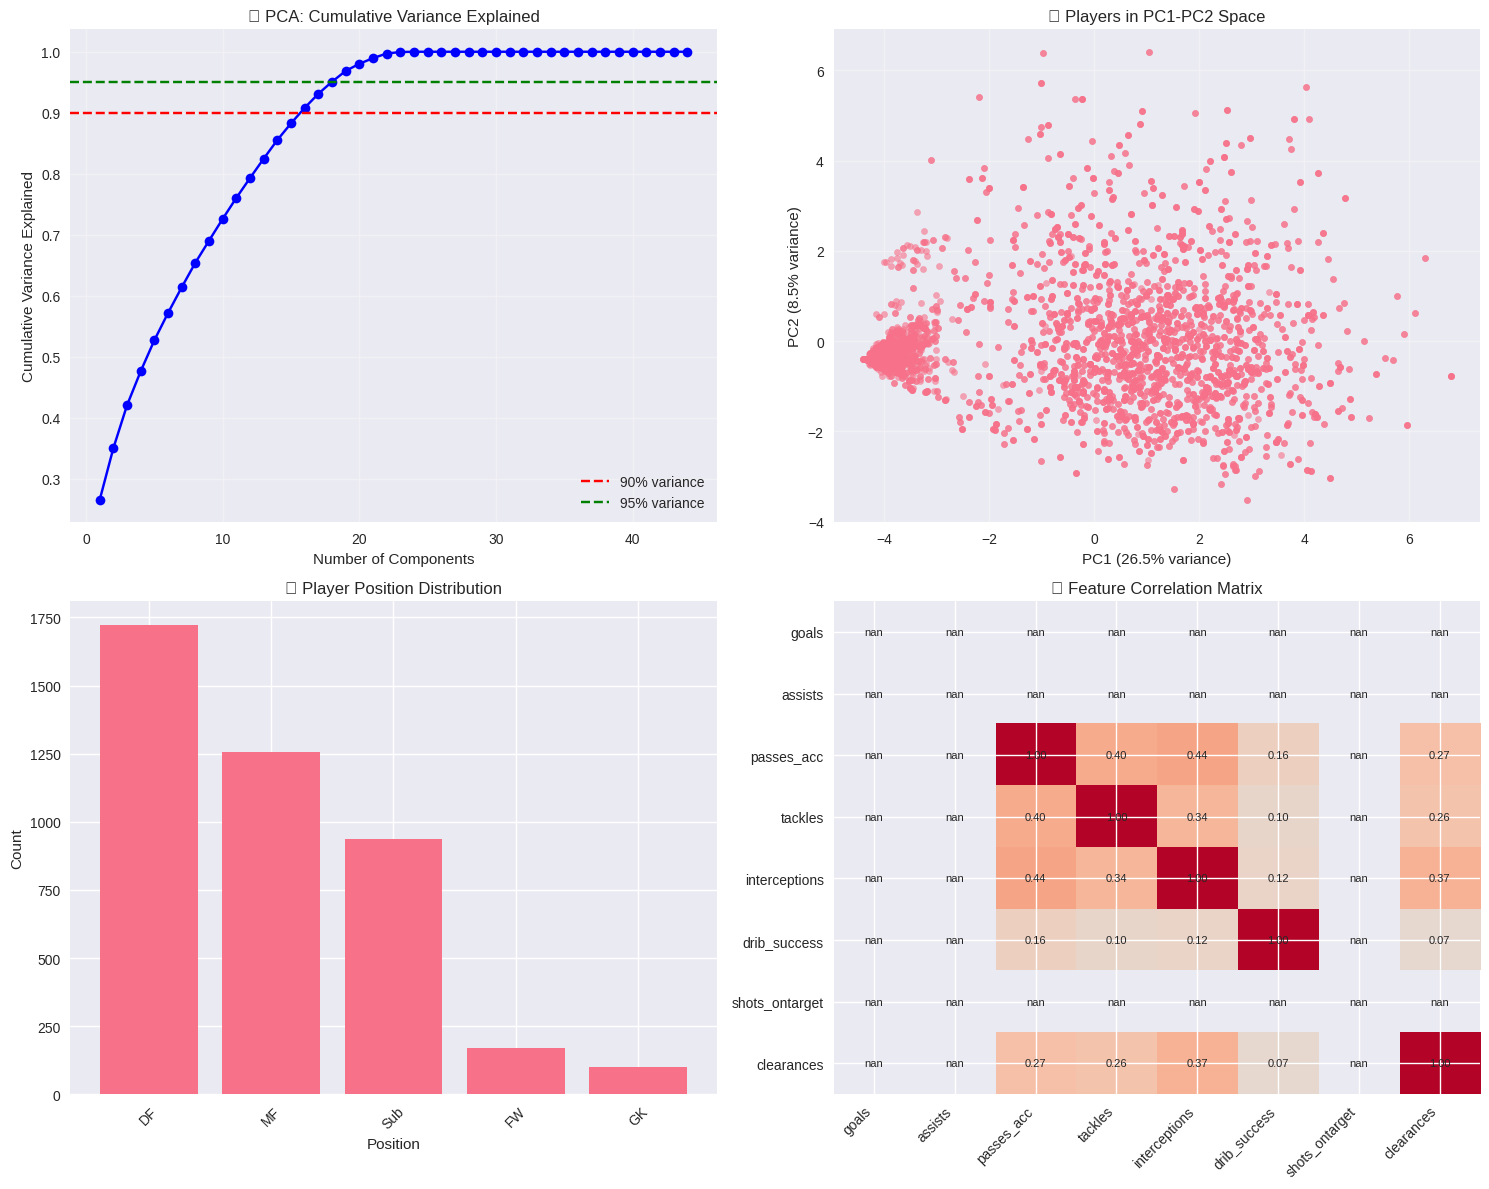


 Statistical Summary by Position:
 Position Count Avg_Goals Avg_Passes Avg_Tackles Avg_Dribbles
0 DF 1724 0.0 35.22 1.44 0.25
1 Sub 937 0.0 2.44 0.11 0.04
2 MF 1258 0.0 31.17 1.39 0.32
3 GK 100 0.0 14.85 0.02 0.00
4 FW 169 0.0 13.02 0.57 0.33

 EDA Complete - Prepared for clustering!


In [5]:
# Exploratory Data Analysis
print(" Exploratory Data Analysis")
print("="*50)

# 1. PCA Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Variance explained plot
axes[0, 0].plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 'bo-')
axes[0, 0].axhline(y=0.90, color='r', linestyle='--', label='90% variance')
axes[0, 0].axhline(y=0.95, color='g', linestyle='--', label='95% variance')
axes[0, 0].set_xlabel('Number of Components')
axes[0, 0].set_ylabel('Cumulative Variance Explained')
axes[0, 0].set_title(' PCA: Cumulative Variance Explained')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# First two principal components
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_standard)

axes[0, 1].scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6, s=20)
axes[0, 1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
axes[0, 1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
axes[0, 1].set_title(' Players in PC1-PC2 Space')
axes[0, 1].grid(True, alpha=0.3)

# Position distribution
position_counts = player_info_clean['pos'].value_counts()
axes[1, 0].bar(position_counts.index, position_counts.values)
axes[1, 0].set_xlabel('Position')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title(' Player Position Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Feature correlation heatmap (top features)
top_features = ['goals', 'assists', 'passes_acc', 'tackles', 'interceptions', 
 'drib_success', 'shots_ontarget', 'clearances']
available_top_features = [f for f in top_features if f in clustering_data_clean.columns]

if len(available_top_features) > 0:
 corr_matrix = clustering_data_clean[available_top_features].corr()
 im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
 axes[1, 1].set_xticks(range(len(available_top_features)))
 axes[1, 1].set_yticks(range(len(available_top_features)))
 axes[1, 1].set_xticklabels(available_top_features, rotation=45, ha='right')
 axes[1, 1].set_yticklabels(available_top_features)
 axes[1, 1].set_title(' Feature Correlation Matrix')
 
 # Add correlation values
 for i in range(len(available_top_features)):
 for j in range(len(available_top_features)):
 axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
 ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 2. Statistical Summary by Position
print(f"\n Statistical Summary by Position:")
position_stats = []

for pos in player_info_clean['pos'].unique():
 pos_mask = player_info_clean['pos'] == pos
 pos_data = clustering_data_clean[pos_mask]
 
 if len(pos_data) > 5: # Only analyze positions with enough samples
 stats = {
 'Position': pos,
 'Count': len(pos_data),
 'Avg_Goals': pos_data['goals'].mean() if 'goals' in pos_data.columns else 0,
 'Avg_Passes': pos_data['passes_acc'].mean() if 'passes_acc' in pos_data.columns else 0,
 'Avg_Tackles': pos_data['tackles'].mean() if 'tackles' in pos_data.columns else 0,
 'Avg_Dribbles': pos_data['drib_success'].mean() if 'drib_success' in pos_data.columns else 0
 }
 position_stats.append(stats)

if position_stats:
 position_df = pd.DataFrame(position_stats)
 print(position_df.round(2))

print(f"\n EDA Complete - Prepared for clustering!")

## Finding Optimal Number of Clusters

use multiple methods to determine the best number of clusters.

 Finding Optimal Number of Clusters
 Testing different cluster numbers...
 Testing k=2... Silhouette: 0.185
 Testing k=3... Silhouette: 0.190
 Testing k=4... Silhouette: 0.166
 Testing k=5... Silhouette: 0.173
 Testing k=6... Silhouette: 0.180
 Testing k=7... Silhouette: 0.169
 Testing k=8... Silhouette: 0.170
 Testing k=9... Silhouette: 0.168
 Testing k=10... Silhouette: 0.172


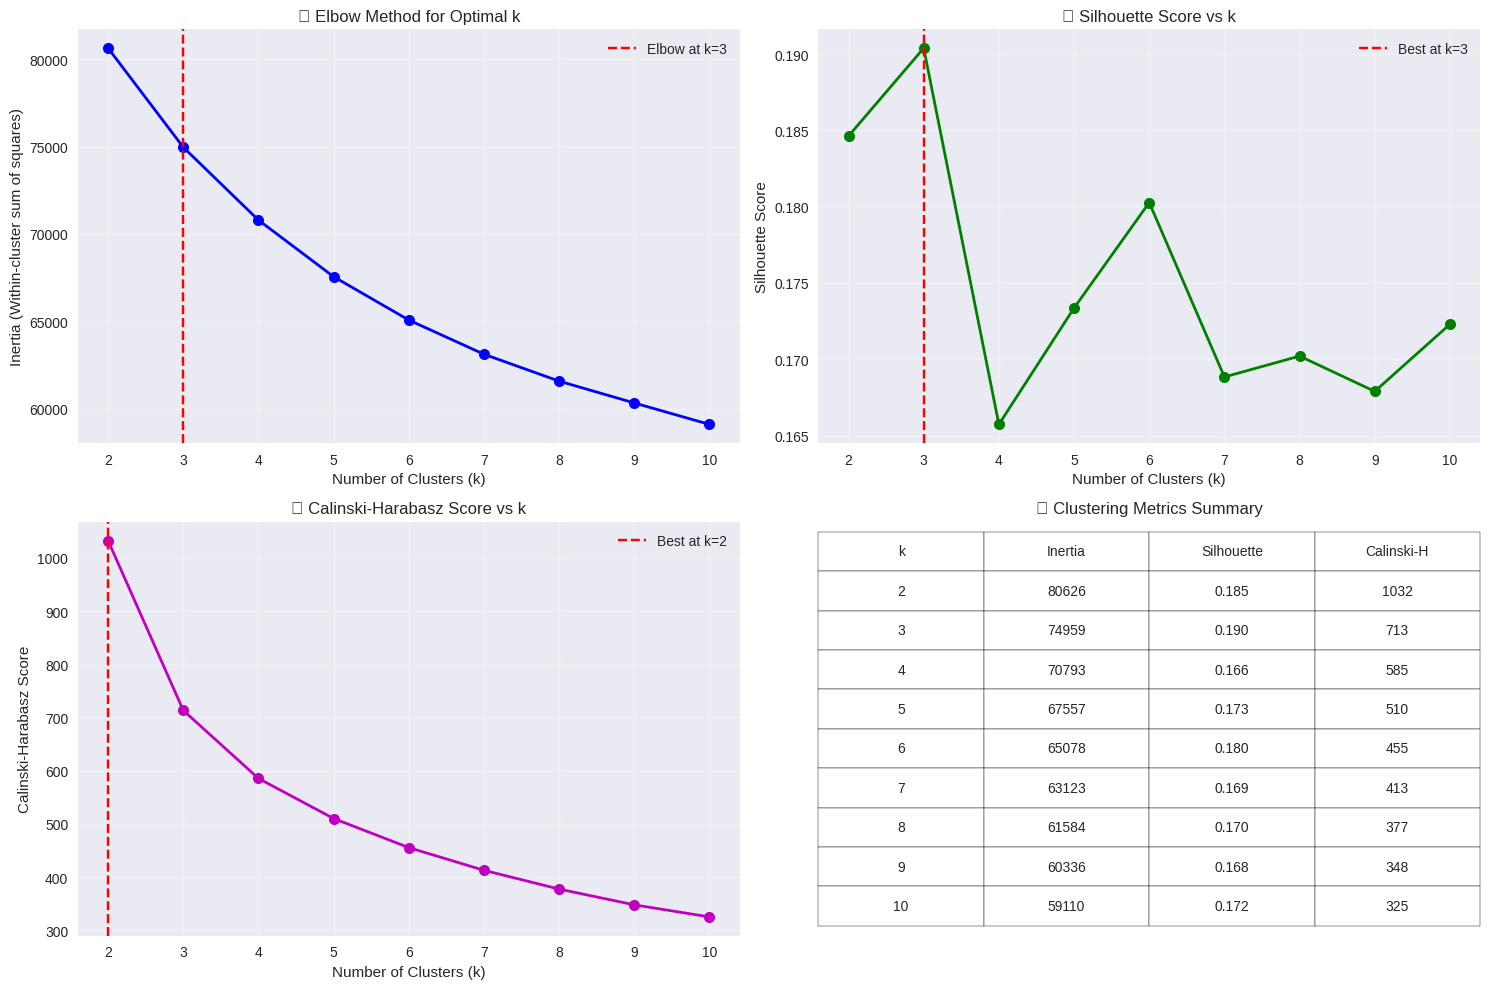


 Cluster Number Recommendations:
 Elbow Method suggests: k=3
 Best Silhouette Score: k=3 (score: 0.190)
 Best Calinski-Harabasz: k=2 (score: 1032)

 Selected optimal k = 3 based on Silhouette Score


In [6]:
# Finding Optimal Number of Clusters
print(" Finding Optimal Number of Clusters")
print("="*60)

# Test range of cluster numbers
k_range = range(2, 11)
data_to_test = data_standard # Use standardized data

# Storage for metrics
inertias = []
silhouette_scores = []
calinski_scores = []

print(" Testing different cluster numbers...")

for k in k_range:
 print(f" Testing k={k}...", end="")
 
 # K-Means clustering
 kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
 cluster_labels = kmeans.fit_predict(data_to_test)
 
 # Calculate metrics
 inertia = kmeans.inertia_
 silhouette = silhouette_score(data_to_test, cluster_labels)
 calinski = calinski_harabasz_score(data_to_test, cluster_labels)
 
 inertias.append(inertia)
 silhouette_scores.append(silhouette)
 calinski_scores.append(calinski)
 
 print(f" Silhouette: {silhouette:.3f}")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Elbow Method (Inertia)
axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia (Within-cluster sum of squares)')
axes[0, 0].set_title(' Elbow Method for Optimal k')
axes[0, 0].grid(True, alpha=0.3)

# Mark potential elbow
if len(inertias) > 2:
 # Simple elbow detection: largest decrease
 decreases = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
 elbow_k = k_range[np.argmax(decreases) + 1]
 axes[0, 0].axvline(x=elbow_k, color='red', linestyle='--', 
 label=f'Elbow at k={elbow_k}')
 axes[0, 0].legend()

# 2. Silhouette Score
axes[0, 1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title(' Silhouette Score vs k')
axes[0, 1].grid(True, alpha=0.3)

# Mark best silhouette score
best_sil_k = k_range[np.argmax(silhouette_scores)]
axes[0, 1].axvline(x=best_sil_k, color='red', linestyle='--',
 label=f'Best at k={best_sil_k}')
axes[0, 1].legend()

# 3. Calinski-Harabasz Score
axes[1, 0].plot(k_range, calinski_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Calinski-Harabasz Score')
axes[1, 0].set_title(' Calinski-Harabasz Score vs k')
axes[1, 0].grid(True, alpha=0.3)

# Mark best CH score
best_ch_k = k_range[np.argmax(calinski_scores)]
axes[1, 0].axvline(x=best_ch_k, color='red', linestyle='--',
 label=f'Best at k={best_ch_k}')
axes[1, 0].legend()

# 4. Summary table
axes[1, 1].axis('off')
summary_data = []
for i, k in enumerate(k_range):
 summary_data.append([
 k, 
 f"{inertias[i]:.0f}",
 f"{silhouette_scores[i]:.3f}",
 f"{calinski_scores[i]:.0f}"
 ])

table = axes[1, 1].table(
 cellText=summary_data,
 colLabels=['k', 'Inertia', 'Silhouette', 'Calinski-H'],
 cellLoc='center',
 loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 1].set_title(' Clustering Metrics Summary')

plt.tight_layout()
plt.show()

# Recommendation
print(f"\n Cluster Number Recommendations:")
print(f" Elbow Method suggests: k={elbow_k}")
print(f" Best Silhouette Score: k={best_sil_k} (score: {max(silhouette_scores):.3f})")
print(f" Best Calinski-Harabasz: k={best_ch_k} (score: {max(calinski_scores):.0f})")

# Choose optimal k (you can modify this logic)
optimal_k = best_sil_k # Using silhouette score as primary metric
print(f"\n Selected optimal k = {optimal_k} based on Silhouette Score")

## K-Means Clustering

K-Means is one of the most popular clustering algorithms. It partitions the data into k clusters by minimizing the within-cluster sum of squares. Each player will be assigned to the cluster whose centroid is closest to their feature vector.

 K-Means Clustering Analysis
 Applying K-Means with k=3 clusters...
 K-Means clustering completed
 Cluster distribution:
 Cluster 0: 2485 players (59.3%)
 Cluster 1: 1203 players (28.7%)
 Cluster 2: 500 players (11.9%)

 Cluster Centers (Original Scale):


,goals,assists,shots_ontarget,shots_offtarget,chances2score,keypasses,passes_acc,passes_inacc,crosses_acc,crosses_inacc,...,saved_pen,goals_ag_itb,goals_ag_otb,shotsblocked,countattack,offsides,missed_penalties,owngoals,minutesPlayed,game_duration
Cluster 0,0.0,0.0,0.0,0.05,0.01,0.0,33.90,5.59,0.22,0.45,...,0.0,0.0,0.0,0.0,0.34,0.0,0.0,0.0,86.61,90.0
Cluster 1,0.0,0.0,0.0,0.06,0.04,0.0,4.95,0.92,0.04,0.13,...,0.0,0.0,0.0,0.0,0.13,0.0,0.0,0.0,88.44,90.0
Cluster 2,0.0,0.0,0.0,1.12,1.08,0.0,31.41,4.98,0.20,0.44,...,0.0,0.0,0.0,0.0,0.33,0.0,0.0,0.0,83.19,90.0



 K-Means Performance Metrics:
 Silhouette Score: 0.1904
 Calinski-Harabasz Score: 713.33
 📉 Inertia: 74958.68

 Visualizing K-Means clusters...


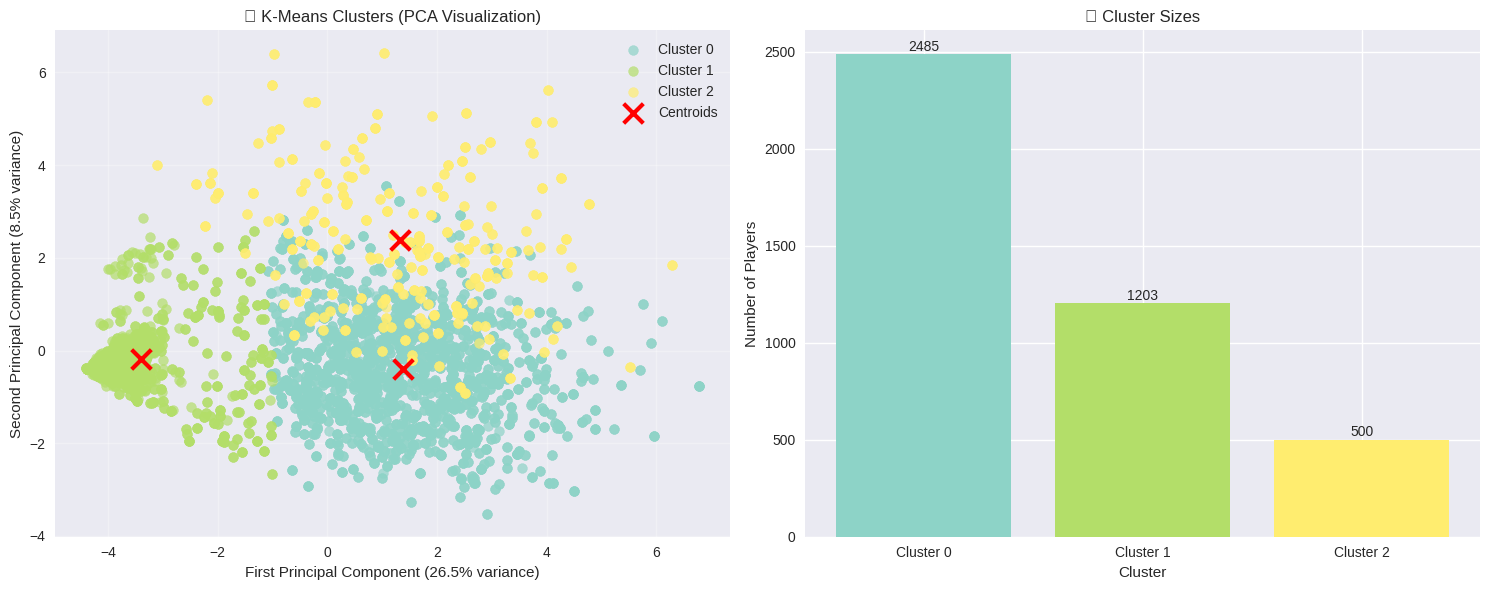


 PCA explains 35.0% of total variance in 2D visualization


In [8]:
# K-Means Clustering
print(" K-Means Clustering Analysis")
print("="*60)

# Apply K-Means with optimal number of clusters
print(f" Applying K-Means with k={optimal_k} clusters...")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_standard)

# Add cluster labels to original dataframe
df_clustering = clustering_data_clean.copy()
df_clustering['KMeans_Cluster'] = kmeans_labels

print(f" K-Means clustering completed")
print(f" Cluster distribution:")

# Cluster distribution
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
 percentage = (count / len(kmeans_labels)) * 100
 print(f" Cluster {cluster_id}: {count} players ({percentage:.1f}%)")

# Calculate cluster centers in original scale
cluster_centers_original = scaler_standard.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers_original, columns=clustering_data_clean.columns)
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]

print(f"\n Cluster Centers (Original Scale):")
print("="*80)
display(centers_df.round(2))

# Performance metrics
silhouette_avg = silhouette_score(data_standard, kmeans_labels)
calinski_score = calinski_harabasz_score(data_standard, kmeans_labels)

print(f"\n K-Means Performance Metrics:")
print(f" Silhouette Score: {silhouette_avg:.4f}")
print(f" Calinski-Harabasz Score: {calinski_score:.2f}")
print(f" 📉 Inertia: {kmeans.inertia_:.2f}")

# Visualize clusters using PCA
print(f"\n Visualizing K-Means clusters...")

# Apply PCA for visualization
pca_vis = PCA(n_components=2, random_state=42)
data_pca = pca_vis.fit_transform(data_standard)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot of clusters
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
 cluster_mask = kmeans_labels == i
 axes[0].scatter(data_pca[cluster_mask, 0], data_pca[cluster_mask, 1], 
 c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)

# Plot cluster centers
centers_pca = pca_vis.transform(kmeans.cluster_centers_)
axes[0].scatter(centers_pca[:, 0], centers_pca[:, 1], 
 c='red', marker='x', s=200, linewidths=3, label='Centroids')

axes[0].set_xlabel(f'First Principal Component ({pca_vis.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'Second Principal Component ({pca_vis.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title(' K-Means Clusters (PCA Visualization)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Cluster sizes
cluster_sizes = pd.Series(kmeans_labels).value_counts().sort_index()
bars = axes[1].bar(range(optimal_k), cluster_sizes, color=colors)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Players')
axes[1].set_title(' Cluster Sizes')
axes[1].set_xticks(range(optimal_k))
axes[1].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)])

# Add value labels on bars
for i, (bar, size) in enumerate(zip(bars, cluster_sizes)):
 axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
 str(size), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n PCA explains {pca_vis.explained_variance_ratio_.sum():.1%} of total variance in 2D visualization")

## 🌳 Hierarchical Clustering

Hierarchical clustering creates a tree-like structure of clusters. We'll use Agglomerative clustering which builds clusters from bottom-up by iteratively merging the closest clusters. This method doesn't require specifying the number of clusters beforehand and provides insights into the cluster hierarchy.

🌳 Hierarchical Clustering Analysis
 Creating dendrogram...
 📝 Using sample of 100 players for dendrogram visualization


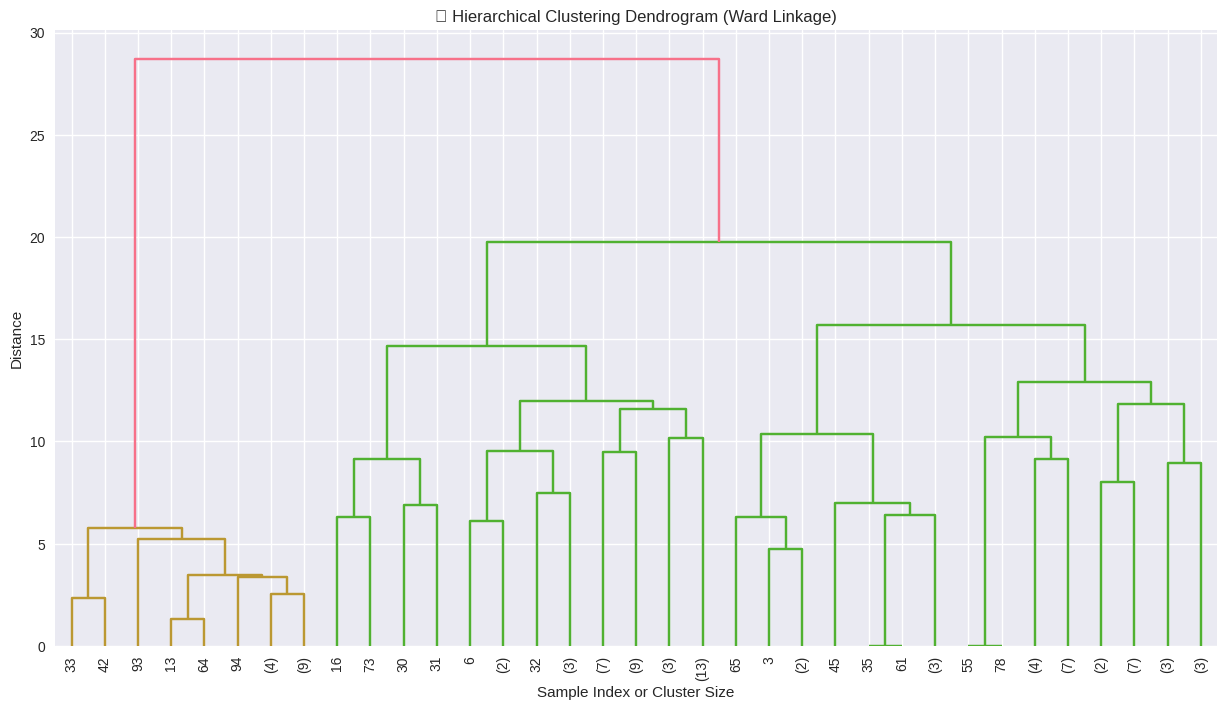


 Applying Hierarchical Clustering with 3 clusters...
 Hierarchical clustering completed
 Cluster distribution:
 Cluster 0: 2626 players (62.7%)
 Cluster 1: 1077 players (25.7%)
 Cluster 2: 485 players (11.6%)

 Hierarchical Clustering Performance Metrics:
 Silhouette Score: 0.1775
 Calinski-Harabasz Score: 672.26


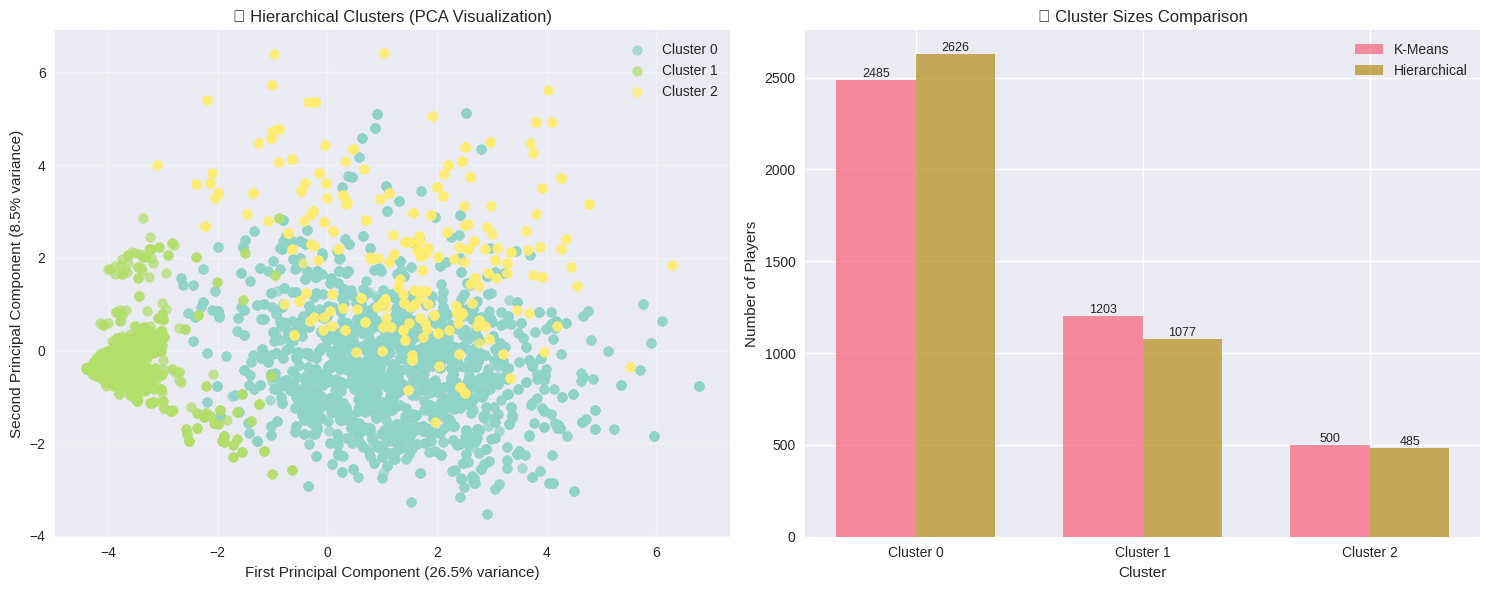


 Comparing different linkage methods...

 Linkage Methods Comparison:
Method Silhouette Calinski-H 
----------------------------------------
ward 0.1775 672 
complete 0.1345 299 
average 0.2163 62 
single 0.2623 7 

 Best linkage method: single (Silhouette: 0.2623)
 Updating hierarchical clustering to use single linkage...


In [10]:
# Hierarchical Clustering
print("🌳 Hierarchical Clustering Analysis")
print("="*60)

# Create dendrogram to visualize hierarchy
print(" Creating dendrogram...")

# For dendrogram, we'll use a sample if dataset is large
max_samples = 100 # Limit for dendrogram readability
if len(data_standard) > max_samples:
 sample_indices = np.random.choice(len(data_standard), max_samples, replace=False)
 data_sample = data_standard.iloc[sample_indices].values
 print(f" 📝 Using sample of {max_samples} players for dendrogram visualization")
else:
 data_sample = data_standard.values
 sample_indices = np.arange(len(data_standard))

# Create linkage matrix
linkage_matrix = linkage(data_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, 
 truncate_mode='level', 
 p=5, # Show only top 5 levels
 leaf_rotation=90,
 leaf_font_size=10)
plt.title('🌳 Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering with optimal k
print(f"\n Applying Hierarchical Clustering with {optimal_k} clusters...")

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_standard.values)

# Add to dataframe
df_clustering['Hierarchical_Cluster'] = hierarchical_labels

print(f" Hierarchical clustering completed")
print(f" Cluster distribution:")

# Cluster distribution
h_cluster_counts = pd.Series(hierarchical_labels).value_counts().sort_index()
for cluster_id, count in h_cluster_counts.items():
 percentage = (count / len(hierarchical_labels)) * 100
 print(f" Cluster {cluster_id}: {count} players ({percentage:.1f}%)")

# Performance metrics
h_silhouette = silhouette_score(data_standard.values, hierarchical_labels)
h_calinski = calinski_harabasz_score(data_standard.values, hierarchical_labels)

print(f"\n Hierarchical Clustering Performance Metrics:")
print(f" Silhouette Score: {h_silhouette:.4f}")
print(f" Calinski-Harabasz Score: {h_calinski:.2f}")

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: PCA visualization
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
 cluster_mask = hierarchical_labels == i
 axes[0].scatter(data_pca[cluster_mask, 0], data_pca[cluster_mask, 1], 
 c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)

axes[0].set_xlabel(f'First Principal Component ({pca_vis.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'Second Principal Component ({pca_vis.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('🌳 Hierarchical Clusters (PCA Visualization)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Cluster sizes comparison
x = np.arange(optimal_k)
width = 0.35

bars1 = axes[1].bar(x - width/2, cluster_counts, width, label='K-Means', alpha=0.8)
bars2 = axes[1].bar(x + width/2, h_cluster_counts, width, label='Hierarchical', alpha=0.8)

axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Players')
axes[1].set_title(' Cluster Sizes Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)])
axes[1].legend()

# Add value labels
for bars in [bars1, bars2]:
 for bar in bars:
 height = bar.get_height()
 axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
 f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Try different linkage methods for comparison
print(f"\n Comparing different linkage methods...")
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_results = {}

for method in linkage_methods:
 if method == 'ward':
 # Ward linkage (already computed)
 linkage_results[method] = {
 'labels': hierarchical_labels,
 'silhouette': h_silhouette,
 'calinski': h_calinski
 }
 else:
 # Other linkage methods
 hierarchical_temp = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
 temp_labels = hierarchical_temp.fit_predict(data_standard.values)
 temp_silhouette = silhouette_score(data_standard.values, temp_labels)
 temp_calinski = calinski_harabasz_score(data_standard.values, temp_labels)
 
 linkage_results[method] = {
 'labels': temp_labels,
 'silhouette': temp_silhouette,
 'calinski': temp_calinski
 }

# Display comparison
print(f"\n Linkage Methods Comparison:")
print("="*80)
print(f"{'Method':<12} {'Silhouette':<12} {'Calinski-H':<12}")
print("-" * 40)

best_linkage = None
best_score = -1

for method, results in linkage_results.items():
 print(f"{method:<12} {results['silhouette']:<12.4f} {results['calinski']:<12.0f}")
 if results['silhouette'] > best_score:
 best_score = results['silhouette']
 best_linkage = method

print(f"\n Best linkage method: {best_linkage} (Silhouette: {best_score:.4f})")

# Update with best linkage method if different from ward
if best_linkage != 'ward':
 print(f" Updating hierarchical clustering to use {best_linkage} linkage...")
 df_clustering['Hierarchical_Cluster'] = linkage_results[best_linkage]['labels']

## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can find arbitrarily-shaped clusters and identify outliers as noise. Unlike K-Means and Hierarchical clustering, DBSCAN doesn't require specifying the number of clusters beforehand.

 DBSCAN Clustering Analysis
 Finding optimal eps parameter...
 📏 Using min_samples = 44
 Suggested eps value: 6.9948

 Testing different eps values...
 eps=3.497: 1 clusters, 2052 noise points (49.0%)
 eps=4.663: 1 clusters, 309 noise points (7.4%)
 eps=5.829: 1 clusters, 4 noise points (0.1%)
 eps=6.995: 1 clusters, 0 noise points (0.0%)
 eps=8.161: 1 clusters, 0 noise points (0.0%)
 eps=9.326: 1 clusters, 0 noise points (0.0%)
 eps=10.492: 1 clusters, 0 noise points (0.0%)
 eps=11.658: 1 clusters, 0 noise points (0.0%)
 eps=12.824: 1 clusters, 0 noise points (0.0%)
 eps=13.990: 1 clusters, 0 noise points (0.0%)


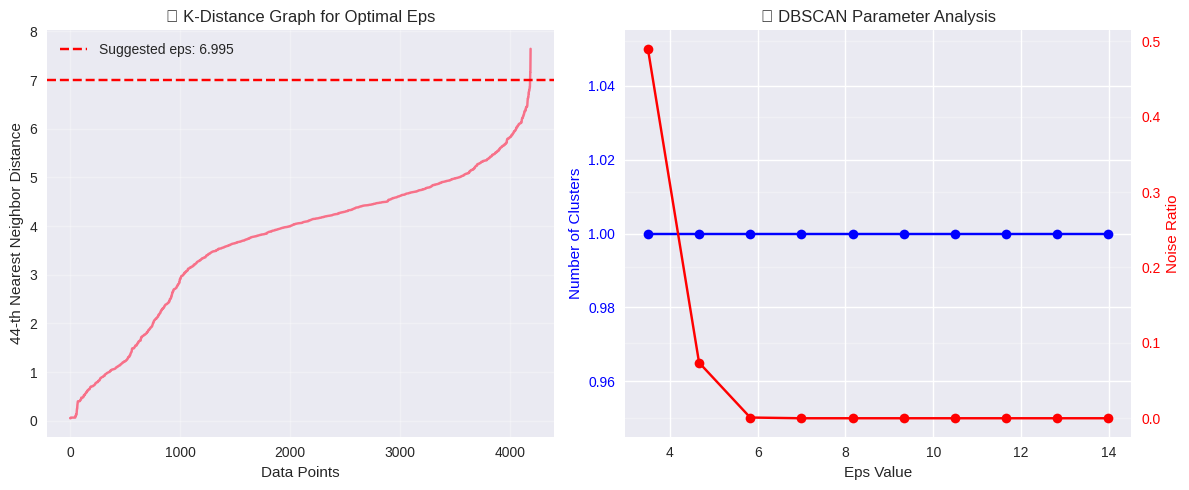


 Using suggested eps = 6.9948 (no valid silhouette scores found)

 Applying DBSCAN clustering...
 DBSCAN clustering completed
 Found 1 clusters
 0 noise points (0.0%)

 Cluster distribution:
 Cluster 0: 4188 players (100.0%)

 DBSCAN did not find meaningful clusters

 Visualizing DBSCAN clusters...


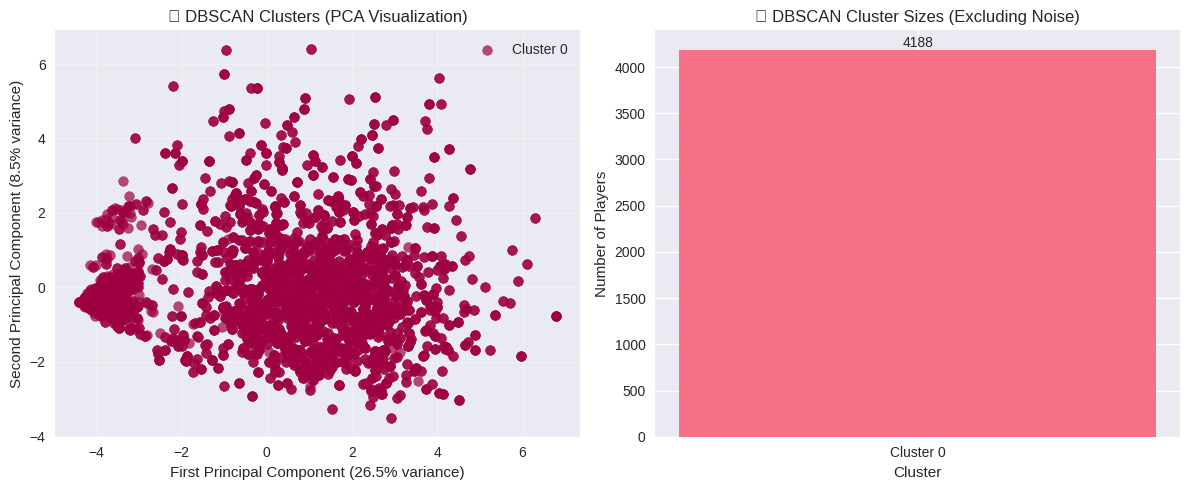

In [13]:
# DBSCAN Clustering
print(" DBSCAN Clustering Analysis")
print("="*60)

# Find optimal eps parameter using k-distance graph
print(" Finding optimal eps parameter...")

# Calculate k-distances (k = min_samples)
min_samples = max(2, len(clustering_data_clean.columns)) # Rule of thumb: 2 * dimensions
print(f" 📏 Using min_samples = {min_samples}")

# Calculate distances to k-th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(data_standard.values)
distances, indices = nbrs.kneighbors(data_standard.values)

# Sort distances to k-th neighbor
k_distances = np.sort(distances[:, min_samples-1])

# Plot k-distance graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_distances)
plt.xlabel('Data Points')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title(' K-Distance Graph for Optimal Eps')
plt.grid(True, alpha=0.3)

# Find elbow in k-distance graph (simple method)
# Calculate second derivative to find inflection point
if len(k_distances) > 10:
 # Smooth the curve first
 from scipy.ndimage import gaussian_filter1d
 smooth_distances = gaussian_filter1d(k_distances, sigma=2)
 
 # Calculate differences
 first_diff = np.diff(smooth_distances)
 second_diff = np.diff(first_diff)
 
 # Find maximum second derivative (sharpest turn)
 elbow_idx = np.argmax(second_diff) + 2 # +2 because of double diff
 optimal_eps = k_distances[elbow_idx]
 
 plt.axhline(y=optimal_eps, color='red', linestyle='--', 
 label=f'Suggested eps: {optimal_eps:.3f}')
 plt.legend()
else:
 optimal_eps = np.percentile(k_distances, 90) # Fallback method

print(f" Suggested eps value: {optimal_eps:.4f}")

# Test different eps values around the optimal
eps_range = np.linspace(optimal_eps * 0.5, optimal_eps * 2, 10)
eps_results = []

print(f"\n Testing different eps values...")

for eps in eps_range:
 dbscan_test = DBSCAN(eps=eps, min_samples=min_samples)
 test_labels = dbscan_test.fit_predict(data_standard.values)
 
 n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)
 n_noise = list(test_labels).count(-1)
 
 # Only calculate silhouette if we have clusters
 if n_clusters > 1 and n_noise < len(test_labels) - 1:
 # Exclude noise points for silhouette calculation
 non_noise_mask = test_labels != -1
 if np.sum(non_noise_mask) > 1:
 silhouette = silhouette_score(data_standard.values[non_noise_mask], 
 test_labels[non_noise_mask])
 else:
 silhouette = -1
 else:
 silhouette = -1
 
 eps_results.append({
 'eps': eps,
 'n_clusters': n_clusters,
 'n_noise': n_noise,
 'noise_ratio': n_noise / len(test_labels),
 'silhouette': silhouette
 })
 
 print(f" eps={eps:.3f}: {n_clusters} clusters, {n_noise} noise points ({n_noise/len(test_labels):.1%})")

# Plot eps analysis
plt.subplot(1, 2, 2)
eps_values = [r['eps'] for r in eps_results]
n_clusters_list = [r['n_clusters'] for r in eps_results]
noise_ratios = [r['noise_ratio'] for r in eps_results]

plt.plot(eps_values, n_clusters_list, 'bo-', label='Number of Clusters')
plt.xlabel('Eps Value')
plt.ylabel('Number of Clusters', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

plt.twinx()
plt.plot(eps_values, noise_ratios, 'ro-', label='Noise Ratio')
plt.ylabel('Noise Ratio', color='red')
plt.tick_params(axis='y', labelcolor='red')

plt.title(' DBSCAN Parameter Analysis')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose best eps based on criteria
valid_results = [r for r in eps_results if r['n_clusters'] > 1 and r['silhouette'] > 0]

if valid_results:
 # Choose eps with highest silhouette score and reasonable noise ratio
 best_result = max(valid_results, key=lambda x: x['silhouette'] if x['noise_ratio'] < 0.3 else -1)
 best_eps = best_result['eps']
 
 print(f"\n Selected eps = {best_eps:.4f}")
 print(f" Expected: {best_result['n_clusters']} clusters, {best_result['noise_ratio']:.1%} noise")
else:
 best_eps = optimal_eps
 print(f"\n Using suggested eps = {best_eps:.4f} (no valid silhouette scores found)")

# Apply DBSCAN with best parameters
print(f"\n Applying DBSCAN clustering...")

dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_standard.values)

# Add to dataframe
df_clustering['DBSCAN_Cluster'] = dbscan_labels

# Analyze results
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f" DBSCAN clustering completed")
print(f" Found {n_clusters} clusters")
print(f" {n_noise} noise points ({n_noise/len(dbscan_labels):.1%})")

if n_clusters > 0:
 print(f"\n Cluster distribution:")
 dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
 for cluster_id, count in dbscan_counts.items():
 if cluster_id == -1:
 print(f" Noise: {count} players ({count/len(dbscan_labels):.1%})")
 else:
 print(f" Cluster {cluster_id}: {count} players ({count/len(dbscan_labels):.1%})")

# Performance metrics (excluding noise points)
if n_clusters > 1 and n_noise < len(dbscan_labels) - 1:
 non_noise_mask = dbscan_labels != -1
 if np.sum(non_noise_mask) > 1:
 dbscan_silhouette = silhouette_score(data_standard.values[non_noise_mask], 
 dbscan_labels[non_noise_mask])
 dbscan_calinski = calinski_harabasz_score(data_standard.values[non_noise_mask], 
 dbscan_labels[non_noise_mask])
 
 print(f"\n DBSCAN Performance Metrics (excluding noise):")
 print(f" Silhouette Score: {dbscan_silhouette:.4f}")
 print(f" Calinski-Harabasz Score: {dbscan_calinski:.2f}")
 else:
 print(f"\n Not enough non-noise points for performance metrics")
 dbscan_silhouette = -1
 dbscan_calinski = -1
else:
 print(f"\n DBSCAN did not find meaningful clusters")
 dbscan_silhouette = -1
 dbscan_calinski = -1

# Visualize DBSCAN results
print(f"\n Visualizing DBSCAN clusters...")

plt.figure(figsize=(12, 5))

# Plot 1: DBSCAN clusters
plt.subplot(1, 2, 1)
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
 if k == -1:
 # Noise points in black
 class_member_mask = (dbscan_labels == k)
 xy = data_pca[class_member_mask]
 plt.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', s=50, alpha=0.5, label='Noise')
 else:
 class_member_mask = (dbscan_labels == k)
 xy = data_pca[class_member_mask]
 plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, alpha=0.7, label=f'Cluster {k}')

plt.xlabel(f'First Principal Component ({pca_vis.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca_vis.explained_variance_ratio_[1]:.1%} variance)')
plt.title(' DBSCAN Clusters (PCA Visualization)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cluster sizes (excluding noise)
plt.subplot(1, 2, 2)
dbscan_counts_no_noise = pd.Series([label for label in dbscan_labels if label != -1]).value_counts().sort_index()

if len(dbscan_counts_no_noise) > 0:
 bars = plt.bar(range(len(dbscan_counts_no_noise)), dbscan_counts_no_noise.values)
 plt.xlabel('Cluster')
 plt.ylabel('Number of Players')
 plt.title(' DBSCAN Cluster Sizes (Excluding Noise)')
 plt.xticks(range(len(dbscan_counts_no_noise)), 
 [f'Cluster {i}' for i in dbscan_counts_no_noise.index])
 
 # Add value labels
 for i, (bar, size) in enumerate(zip(bars, dbscan_counts_no_noise.values)):
 plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
 str(size), ha='center', va='bottom')
else:
 plt.text(0.5, 0.5, 'No clusters found\n(only noise points)', 
 ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
 plt.title(' DBSCAN Results')

plt.tight_layout()
plt.show()

## Gaussian Mixture Model (GMM) Clustering

Gaussian Mixture Models assume that the data comes from a mixture of Gaussian distributions. Unlike K-Means which assigns hard clusters, GMM provides soft clustering where each point has a probability of belonging to each cluster. This is particularly useful when clusters overlap or have different shapes and sizes.

 Gaussian Mixture Model (GMM) Clustering
 Finding optimal number of components...
 Testing different number of components...
 Testing 2 components... AIC: -819864.0
 Testing 3 components... AIC: -889518.9
 Testing 4 components... AIC: -913534.7
 Testing 5 components... AIC: -919500.1
 Testing 6 components... AIC: -957816.8
 Testing 7 components... AIC: -939012.1
 Testing 8 components... AIC: -969917.9
 Testing 9 components... AIC: -955952.7
 Testing 10 components... AIC: -966916.1


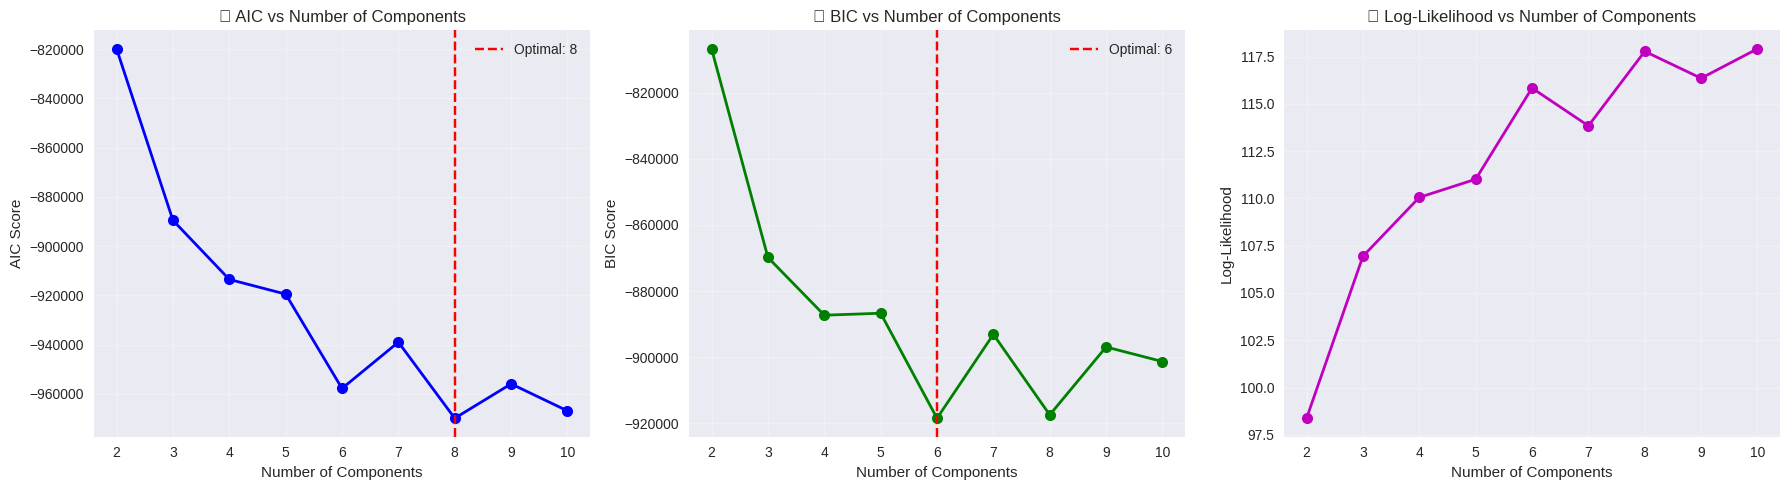


 Optimal number of components:
 AIC suggests: 8 components
 BIC suggests: 6 components

 Selected 6 components based on BIC

 Applying GMM with 6 components...
 GMM clustering completed
 Cluster distribution:
 Cluster 0: 888 players (21.2%, avg prob: 1.000)
 Cluster 1: 161 players (3.8%, avg prob: 1.000)
 Cluster 2: 804 players (19.2%, avg prob: 0.999)
 Cluster 3: 1802 players (43.0%, avg prob: 1.000)
 Cluster 4: 433 players (10.3%, avg prob: 1.000)
 Cluster 5: 100 players (2.4%, avg prob: 1.000)

 GMM Performance Metrics:
 Silhouette Score: 0.1118
 Calinski-Harabasz Score: 287.39
 📉 AIC: -957816.81
 📉 BIC: -918451.88
 Log-Likelihood: 115.84

 Cluster Assignment Confidence:
 Average max probability: 1.000
 Uncertain assignments (prob < 0.6): 0 (0.0%)

 Visualizing GMM clusters...


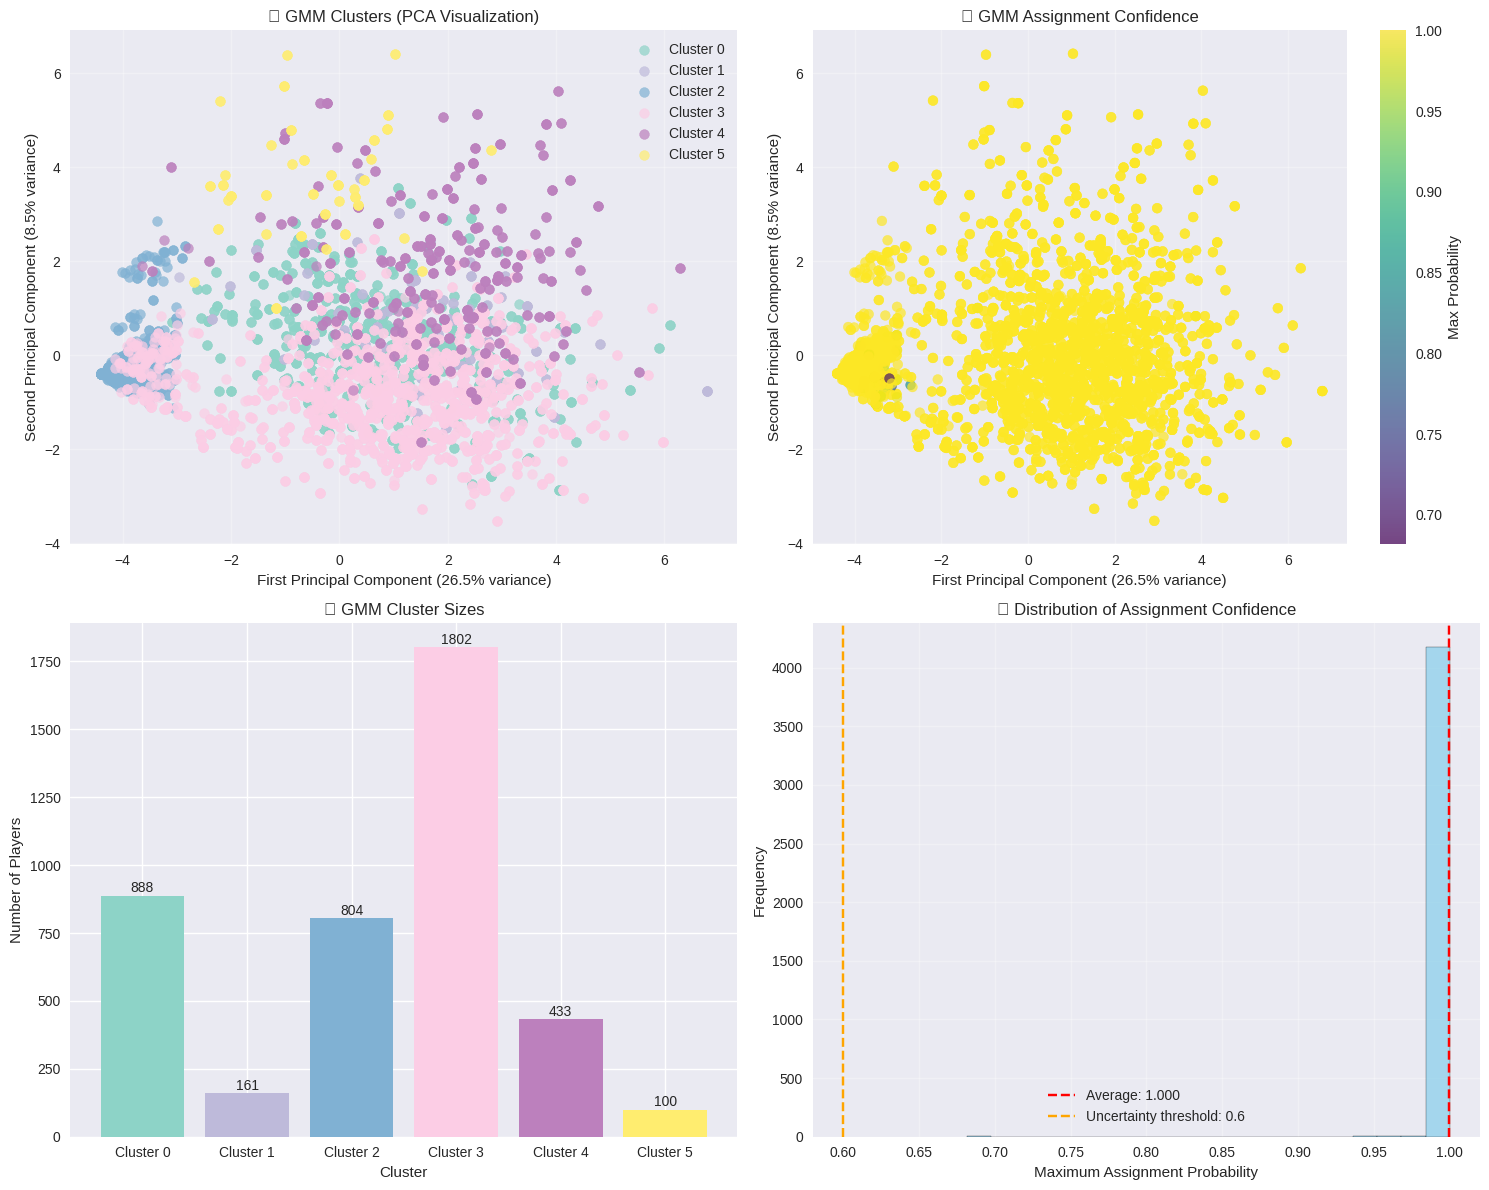


 GMM allows for soft clustering - players can belong to multiple clusters with different probabilities!


In [14]:
# Gaussian Mixture Model Clustering
print(" Gaussian Mixture Model (GMM) Clustering")
print("="*60)

# Find optimal number of components using information criteria
print(" Finding optimal number of components...")

component_range = range(2, min(11, len(data_standard)//10)) # Reasonable range
aic_scores = []
bic_scores = []
log_likelihoods = []

print(" Testing different number of components...")

for n_components in component_range:
 print(f" Testing {n_components} components...", end="")
 
 gmm = GaussianMixture(n_components=n_components, random_state=42)
 gmm.fit(data_standard.values)
 
 aic_scores.append(gmm.aic(data_standard.values))
 bic_scores.append(gmm.bic(data_standard.values))
 log_likelihoods.append(gmm.score(data_standard.values))
 
 print(f" AIC: {gmm.aic(data_standard):.1f}")

# Plot information criteria
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# AIC
axes[0].plot(component_range, aic_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('AIC Score')
axes[0].set_title(' AIC vs Number of Components')
axes[0].grid(True, alpha=0.3)

optimal_aic = component_range[np.argmin(aic_scores)]
axes[0].axvline(x=optimal_aic, color='red', linestyle='--', 
 label=f'Optimal: {optimal_aic}')
axes[0].legend()

# BIC
axes[1].plot(component_range, bic_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('BIC Score')
axes[1].set_title(' BIC vs Number of Components')
axes[1].grid(True, alpha=0.3)

optimal_bic = component_range[np.argmin(bic_scores)]
axes[1].axvline(x=optimal_bic, color='red', linestyle='--', 
 label=f'Optimal: {optimal_bic}')
axes[1].legend()

# Log-Likelihood
axes[2].plot(component_range, log_likelihoods, 'mo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Components')
axes[2].set_ylabel('Log-Likelihood')
axes[2].set_title(' Log-Likelihood vs Number of Components')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Optimal number of components:")
print(f" AIC suggests: {optimal_aic} components")
print(f" BIC suggests: {optimal_bic} components")

# Choose optimal components (BIC is often preferred for model selection)
optimal_components = optimal_bic
print(f"\n Selected {optimal_components} components based on BIC")

# Apply GMM with optimal components
print(f"\n Applying GMM with {optimal_components} components...")

gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm.fit(data_standard.values)
gmm_labels = gmm.predict(data_standard.values)
gmm_probabilities = gmm.predict_proba(data_standard.values)

# Add to dataframe
df_clustering['GMM_Cluster'] = gmm_labels
df_clustering['GMM_Max_Probability'] = np.max(gmm_probabilities, axis=1)

print(f" GMM clustering completed")
print(f" Cluster distribution:")

# Cluster distribution
gmm_counts = pd.Series(gmm_labels).value_counts().sort_index()
for cluster_id, count in gmm_counts.items():
 percentage = (count / len(gmm_labels)) * 100
 avg_prob = np.mean(gmm_probabilities[gmm_labels == cluster_id, cluster_id])
 print(f" Cluster {cluster_id}: {count} players ({percentage:.1f}%, avg prob: {avg_prob:.3f})")

# Performance metrics
gmm_silhouette = silhouette_score(data_standard.values, gmm_labels)
gmm_calinski = calinski_harabasz_score(data_standard.values, gmm_labels)

print(f"\n GMM Performance Metrics:")
print(f" Silhouette Score: {gmm_silhouette:.4f}")
print(f" Calinski-Harabasz Score: {gmm_calinski:.2f}")
print(f" 📉 AIC: {gmm.aic(data_standard.values):.2f}")
print(f" 📉 BIC: {gmm.bic(data_standard.values):.2f}")
print(f" Log-Likelihood: {gmm.score(data_standard.values):.2f}")

# Analyze cluster uncertainties
print(f"\n Cluster Assignment Confidence:")
avg_max_prob = np.mean(gmm_probabilities.max(axis=1))
uncertain_threshold = 0.6 # Threshold for uncertain assignments
uncertain_assignments = np.sum(gmm_probabilities.max(axis=1) < uncertain_threshold)

print(f" Average max probability: {avg_max_prob:.3f}")
print(f" Uncertain assignments (prob < {uncertain_threshold}): {uncertain_assignments} ({uncertain_assignments/len(gmm_labels):.1%})")

# Visualize GMM results
print(f"\n Visualizing GMM clusters...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cluster assignments
colors = plt.cm.Set3(np.linspace(0, 1, optimal_components))
for i in range(optimal_components):
 cluster_mask = gmm_labels == i
 axes[0, 0].scatter(data_pca[cluster_mask, 0], data_pca[cluster_mask, 1], 
 c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)

axes[0, 0].set_xlabel(f'First Principal Component ({pca_vis.explained_variance_ratio_[0]:.1%} variance)')
axes[0, 0].set_ylabel(f'Second Principal Component ({pca_vis.explained_variance_ratio_[1]:.1%} variance)')
axes[0, 0].set_title(' GMM Clusters (PCA Visualization)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Assignment probabilities
scatter = axes[0, 1].scatter(data_pca[:, 0], data_pca[:, 1], 
 c=gmm_probabilities.max(axis=1), 
 cmap='viridis', alpha=0.7, s=50)
axes[0, 1].set_xlabel(f'First Principal Component ({pca_vis.explained_variance_ratio_[0]:.1%} variance)')
axes[0, 1].set_ylabel(f'Second Principal Component ({pca_vis.explained_variance_ratio_[1]:.1%} variance)')
axes[0, 1].set_title(' GMM Assignment Confidence')
plt.colorbar(scatter, ax=axes[0, 1], label='Max Probability')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Cluster sizes
bars = axes[1, 0].bar(range(optimal_components), gmm_counts.values, color=colors)
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Players')
axes[1, 0].set_title(' GMM Cluster Sizes')
axes[1, 0].set_xticks(range(optimal_components))
axes[1, 0].set_xticklabels([f'Cluster {i}' for i in range(optimal_components)])

# Add value labels
for i, (bar, size) in enumerate(zip(bars, gmm_counts.values)):
 axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
 str(size), ha='center', va='bottom')

# Plot 4: Probability distribution
axes[1, 1].hist(gmm_probabilities.max(axis=1), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 1].axvline(x=avg_max_prob, color='red', linestyle='--', 
 label=f'Average: {avg_max_prob:.3f}')
axes[1, 1].axvline(x=uncertain_threshold, color='orange', linestyle='--', 
 label=f'Uncertainty threshold: {uncertain_threshold}')
axes[1, 1].set_xlabel('Maximum Assignment Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(' Distribution of Assignment Confidence')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n GMM allows for soft clustering - players can belong to multiple clusters with different probabilities!")

## Clustering Methods Comparison

compare all four clustering methods we've applied: K-Means, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models. We'll evaluate them based on various metrics and characteristics to determine which method works best for our football player data.

 Clustering Methods Comparison
 Quantitative Comparison:
Method Silhouette Calinski-H Clusters Algorithm 
--------------------------------------------------------------------------------
K-Means 0.1904 713 3 Centroid-based 
Hierarchical 0.1775 672 3 Connectivity-based 
GMM 0.1118 287 6 Distribution-based 

 Best performing method: K-Means (Silhouette Score: 0.1904)

 Visualizing all clustering methods...


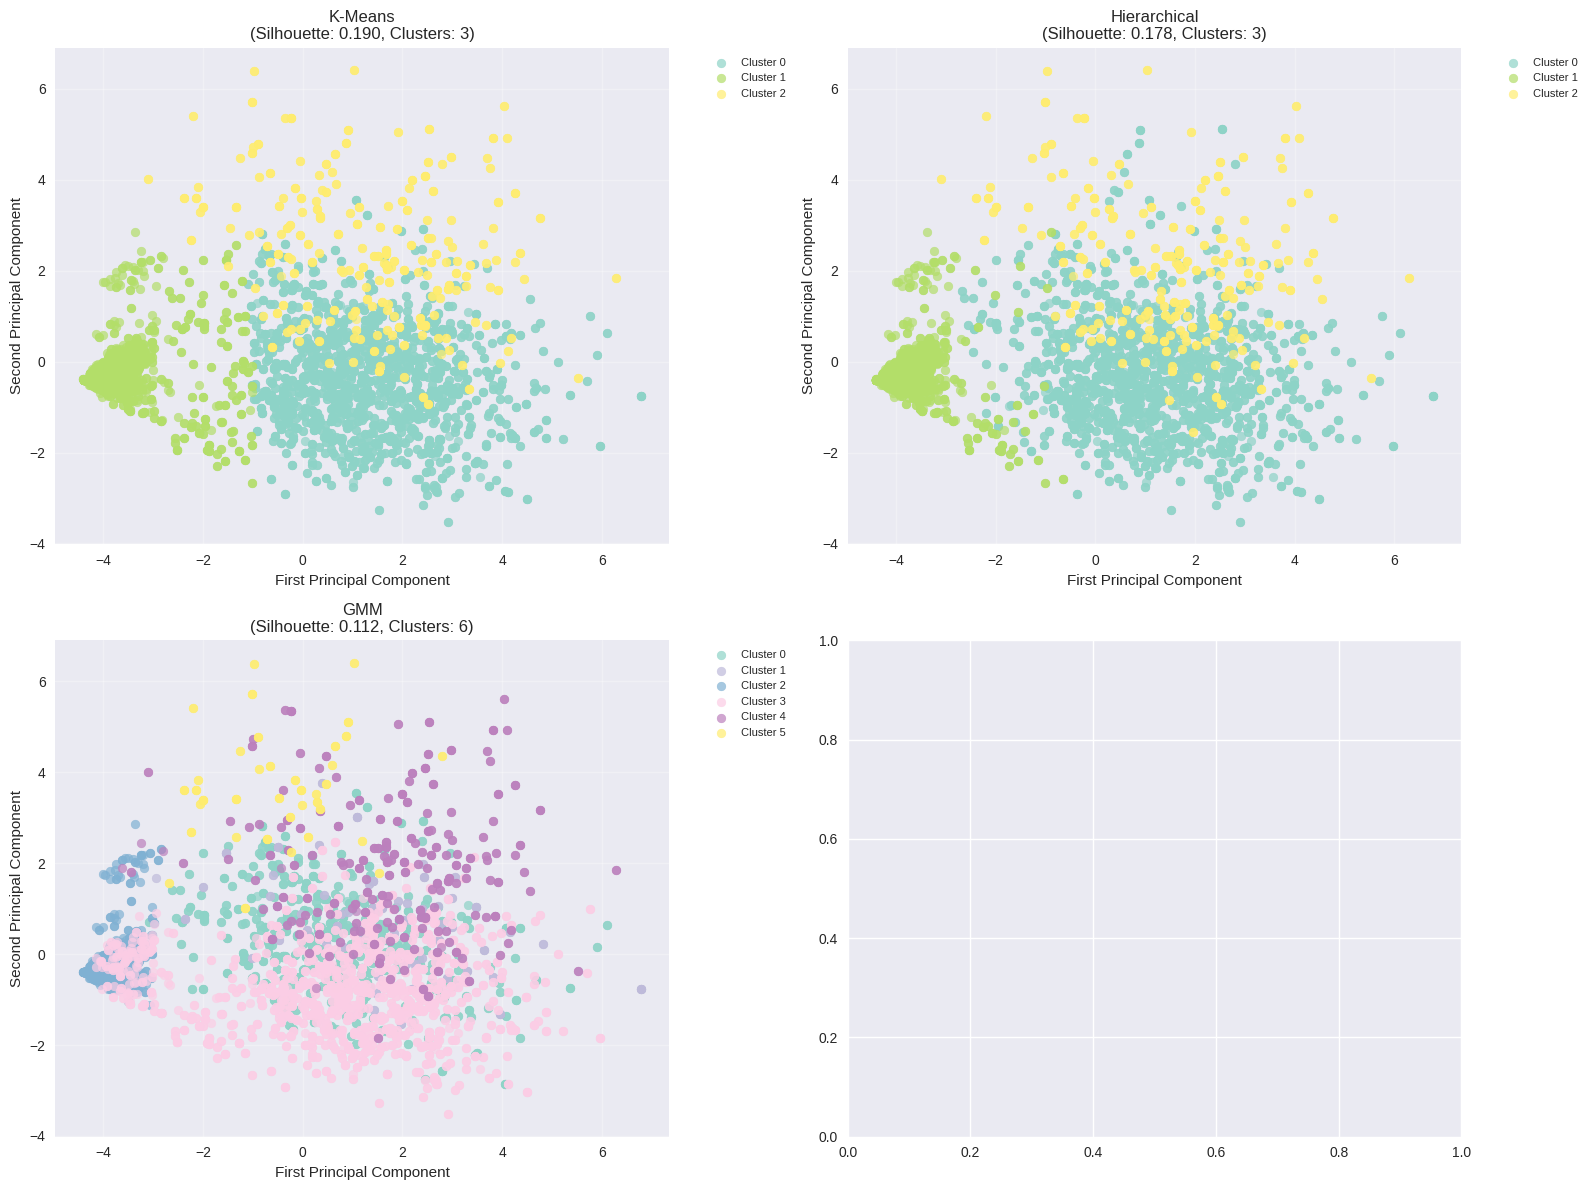


 Clustering Agreement Analysis:


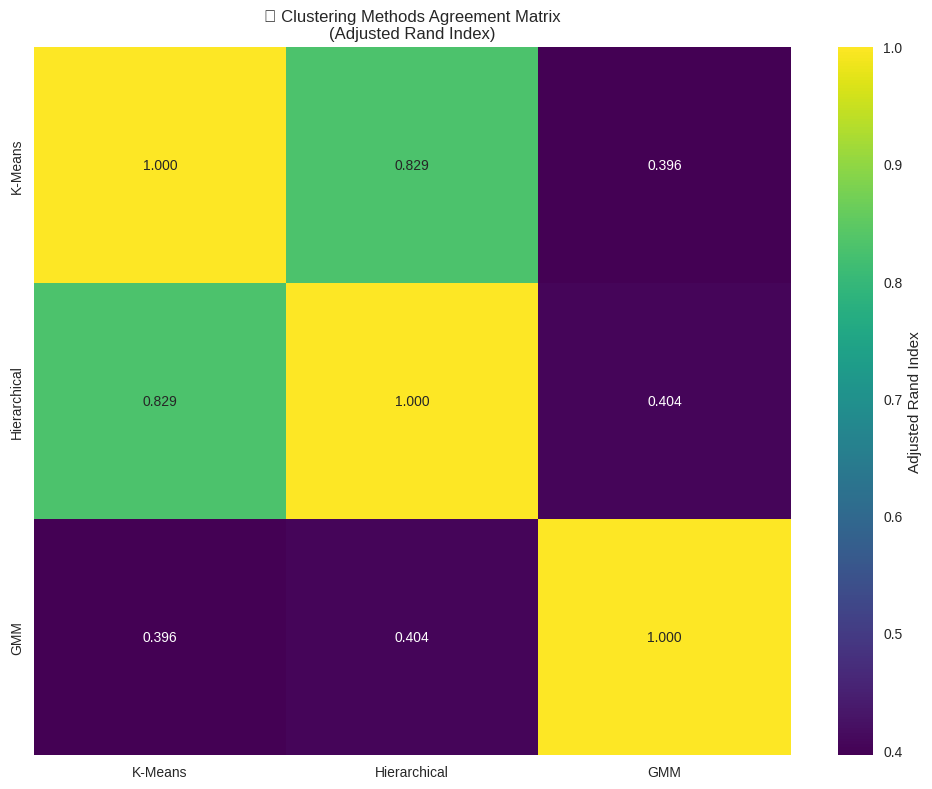

 Agreement Matrix Interpretation:
 - Values close to 1: High agreement between methods
 - Values close to 0: Low agreement between methods
 - Negative values: Worse than random agreement

 Method Agreement Ranking:
 K-Means ↔ Hierarchical: 0.829
 Hierarchical ↔ GMM: 0.404
 K-Means ↔ GMM: 0.396

 Cluster Stability Analysis:
 K-Means Cluster Characteristics:
------------------------------------------------------------

 Cluster 0 (2485 players):
 chances2score: 0.01 (91.8% lower than average)
 shots_offtarget: 0.05 (70.4% lower than average)
 tackles: 1.48 (40.2% higher than average)

 Cluster 1 (1203 players):
 tackles: 0.14 (86.6% lower than average)
 tballs_inacc: 0.03 (84.2% lower than average)
 drib_success: 0.04 (83.9% lower than average)

 Cluster 2 (500 players):
 chances2score: 1.08 (632.9% higher than average)
 shots_offtarget: 1.12 (507.4% higher than average)
 fouls: 1.08 (53.5% higher than average)

 Summary and Recommendations:
 Best performing method: K-Means
 Silhouette S

In [15]:
# Clustering Methods Comparison
print(" Clustering Methods Comparison")
print("="*80)

# Collect all clustering results
clustering_methods = {
 'K-Means': {
 'labels': kmeans_labels,
 'silhouette': silhouette_avg,
 'calinski': calinski_score,
 'n_clusters': len(np.unique(kmeans_labels)),
 'algorithm': 'Centroid-based'
 },
 'Hierarchical': {
 'labels': hierarchical_labels,
 'silhouette': h_silhouette,
 'calinski': h_calinski,
 'n_clusters': len(np.unique(hierarchical_labels)),
 'algorithm': 'Connectivity-based'
 },
 'GMM': {
 'labels': gmm_labels,
 'silhouette': gmm_silhouette,
 'calinski': gmm_calinski,
 'n_clusters': len(np.unique(gmm_labels)),
 'algorithm': 'Distribution-based'
 }
}

# Add DBSCAN if it produced valid clusters
if 'dbscan_silhouette' in locals() and dbscan_silhouette > 0:
 clustering_methods['DBSCAN'] = {
 'labels': dbscan_labels,
 'silhouette': dbscan_silhouette,
 'calinski': dbscan_calinski,
 'n_clusters': len([x for x in np.unique(dbscan_labels) if x != -1]),
 'algorithm': 'Density-based',
 'noise_points': list(dbscan_labels).count(-1)
 }

# Create comparison table
print(" Quantitative Comparison:")
print("="*80)
print(f"{'Method':<15} {'Silhouette':<12} {'Calinski-H':<12} {'Clusters':<10} {'Algorithm':<20}")
print("-" * 80)

best_silhouette = -1
best_method = None

for method, results in clustering_methods.items():
 sil_score = results['silhouette']
 cal_score = results['calinski']
 n_clust = results['n_clusters']
 algorithm = results['algorithm']
 
 if method == 'DBSCAN' and 'noise_points' in results:
 method_display = f"{method} ({results['noise_points']} noise)"
 else:
 method_display = method
 
 print(f"{method_display:<15} {sil_score:<12.4f} {cal_score:<12.0f} {n_clust:<10} {algorithm:<20}")
 
 if sil_score > best_silhouette:
 best_silhouette = sil_score
 best_method = method

print(f"\n Best performing method: {best_method} (Silhouette Score: {best_silhouette:.4f})")

# Visualize all clustering results
print(f"\n Visualizing all clustering methods...")

n_methods = len(clustering_methods)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (method, results) in enumerate(clustering_methods.items()):
 ax = axes[idx]
 labels = results['labels']
 n_clusters = results['n_clusters']
 
 # Handle DBSCAN noise points
 if method == 'DBSCAN':
 unique_labels = set(labels)
 colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
 
 for k, col in zip(unique_labels, colors):
 if k == -1:
 # Noise points
 class_member_mask = (labels == k)
 xy = data_pca[class_member_mask]
 ax.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', s=30, alpha=0.5, label='Noise')
 else:
 class_member_mask = (labels == k)
 xy = data_pca[class_member_mask]
 ax.scatter(xy[:, 0], xy[:, 1], c=[col], s=40, alpha=0.7, label=f'Cluster {k}')
 else:
 # Regular clustering
 colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))
 for i in range(n_clusters):
 cluster_mask = labels == i
 ax.scatter(data_pca[cluster_mask, 0], data_pca[cluster_mask, 1], 
 c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=40)
 
 ax.set_title(f'{method}\n(Silhouette: {results["silhouette"]:.3f}, Clusters: {n_clusters})')
 ax.set_xlabel('First Principal Component')
 ax.set_ylabel('Second Principal Component')
 ax.grid(True, alpha=0.3)
 
 # Add legend for first 3 methods only (to avoid overcrowding)
 if idx < 3:
 ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# Calculate agreement between methods
print(f"\n Clustering Agreement Analysis:")
print("="*60)

# Calculate Adjusted Rand Index between methods
from sklearn.metrics import adjusted_rand_score

method_names = list(clustering_methods.keys())
n_methods = len(method_names)

# Create agreement matrix
agreement_matrix = np.zeros((n_methods, n_methods))

for i, method1 in enumerate(method_names):
 for j, method2 in enumerate(method_names):
 labels1 = clustering_methods[method1]['labels']
 labels2 = clustering_methods[method2]['labels']
 
 # For DBSCAN, convert noise points to a separate cluster
 if method1 == 'DBSCAN':
 labels1 = np.where(labels1 == -1, max(labels1) + 1, labels1)
 if method2 == 'DBSCAN':
 labels2 = np.where(labels2 == -1, max(labels2) + 1, labels2)
 
 ari = adjusted_rand_score(labels1, labels2)
 agreement_matrix[i, j] = ari

# Plot agreement matrix
plt.figure(figsize=(10, 8))
sns.heatmap(agreement_matrix, 
 xticklabels=method_names, 
 yticklabels=method_names,
 annot=True, 
 fmt='.3f',
 cmap='viridis',
 cbar_kws={'label': 'Adjusted Rand Index'})
plt.title(' Clustering Methods Agreement Matrix\n(Adjusted Rand Index)')
plt.tight_layout()
plt.show()

print(" Agreement Matrix Interpretation:")
print(" - Values close to 1: High agreement between methods")
print(" - Values close to 0: Low agreement between methods")
print(" - Negative values: Worse than random agreement")

# Find most agreeable pairs
agreement_pairs = []
for i in range(n_methods):
 for j in range(i+1, n_methods):
 agreement_pairs.append((
 method_names[i], 
 method_names[j], 
 agreement_matrix[i, j]
 ))

agreement_pairs.sort(key=lambda x: x[2], reverse=True)

print(f"\n Method Agreement Ranking:")
for method1, method2, score in agreement_pairs:
 print(f" {method1} ↔ {method2}: {score:.3f}")

# Cluster stability analysis
print(f"\n Cluster Stability Analysis:")
print("="*60)

# For the best method, analyze cluster characteristics
best_labels = clustering_methods[best_method]['labels']

# Calculate feature statistics for each cluster
cluster_stats = []
for cluster_id in np.unique(best_labels):
 if cluster_id == -1: # Skip noise points for DBSCAN
 continue
 
 cluster_mask = best_labels == cluster_id
 cluster_data = clustering_data_clean[cluster_mask]
 
 stats = {
 'cluster': cluster_id,
 'size': np.sum(cluster_mask),
 'mean_stats': cluster_data[clustering_data_clean.columns].mean(),
 'std_stats': cluster_data[clustering_data_clean.columns].std()
 }
 cluster_stats.append(stats)

print(f" {best_method} Cluster Characteristics:")
print("-" * 60)

for stats in cluster_stats:
 cluster_id = stats['cluster']
 size = stats['size']
 print(f"\n Cluster {cluster_id} ({size} players):")
 
 # Show top 3 distinguishing features
 mean_values = stats['mean_stats']
 overall_mean = clustering_data_clean[clustering_data_clean.columns].mean()
 
 # Calculate how much each feature deviates from overall mean
 deviations = abs((mean_values - overall_mean) / overall_mean)
 top_features = deviations.nlargest(3)
 
 for feature in top_features.index:
 cluster_val = mean_values[feature]
 overall_val = overall_mean[feature]
 deviation = ((cluster_val - overall_val) / overall_val) * 100
 
 if deviation > 0:
 direction = "higher"
 else:
 direction = "lower"
 
 print(f" {feature}: {cluster_val:.2f} ({abs(deviation):.1f}% {direction} than average)")

# Summary and recommendations
print(f"\n Summary and Recommendations:")
print("="*80)
print(f" Best performing method: {best_method}")
print(f" Silhouette Score: {clustering_methods[best_method]['silhouette']:.4f}")
print(f" Number of clusters: {clustering_methods[best_method]['n_clusters']}")
print(f" Algorithm type: {clustering_methods[best_method]['algorithm']}")

if best_method == 'K-Means':
 print(f"\n K-Means Insights:")
 print(f" Good for spherical, well-separated clusters")
 print(f" Computationally efficient")
 print(f" Interpretable centroids")
elif best_method == 'Hierarchical':
 print(f"\n Hierarchical Clustering Insights:")
 print(f" Reveals cluster hierarchy")
 print(f" No need to specify number of clusters")
 print(f" Good for nested cluster structures")
elif best_method == 'DBSCAN':
 print(f"\n DBSCAN Insights:")
 print(f" Finds arbitrarily shaped clusters")
 print(f" Identifies outliers/noise")
 print(f" Robust to outliers")
elif best_method == 'GMM':
 print(f"\n GMM Insights:")
 print(f" Probabilistic cluster assignments")
 print(f" Handles overlapping clusters")
 print(f" Flexible cluster shapes")

print(f"\n Clustering analysis completed Use the '{best_method}_Cluster' column for further analysis.")

## Player Profile Analysis

analyze the characteristics of each cluster to understand what types of players they represent. This will help us create meaningful player profiles and insights for team management and scouting.

 Player Profile Analysis
 Analyzing player profiles using K-Means clustering
 Total clusters: 3

 Detailed Cluster Profiles:

 CLUSTER 0 - 2485 players (59.3%)
------------------------------------------------------------
 Key Characteristics (Top 5 distinctive features):
 1. goals: 0.00 (+nan% vs avg) - Low
 2. assists: 0.00 (+nan% vs avg) - Low
 3. shots_ontarget: 0.00 (+nan% vs avg) - Low
 4. chances2score: 0.01 (-91.8% vs avg) - Low
 5. shots_offtarget: 0.05 (-70.4% vs avg) - Low

 Suggested Player Type: Based on goals, assists

 CLUSTER 1 - 1203 players (28.7%)
------------------------------------------------------------
 Key Characteristics (Top 5 distinctive features):
 1. goals: 0.00 (+nan% vs avg) - Low
 2. assists: 0.00 (+nan% vs avg) - Low
 3. shots_ontarget: 0.00 (+nan% vs avg) - Low
 4. keypasses: 0.00 (+nan% vs avg) - Low
 5. tballs_acc: 0.00 (+nan% vs avg) - Low

 Suggested Player Type: Based on goals, assists

 CLUSTER 2 - 500 players (11.9%)
----------------------------

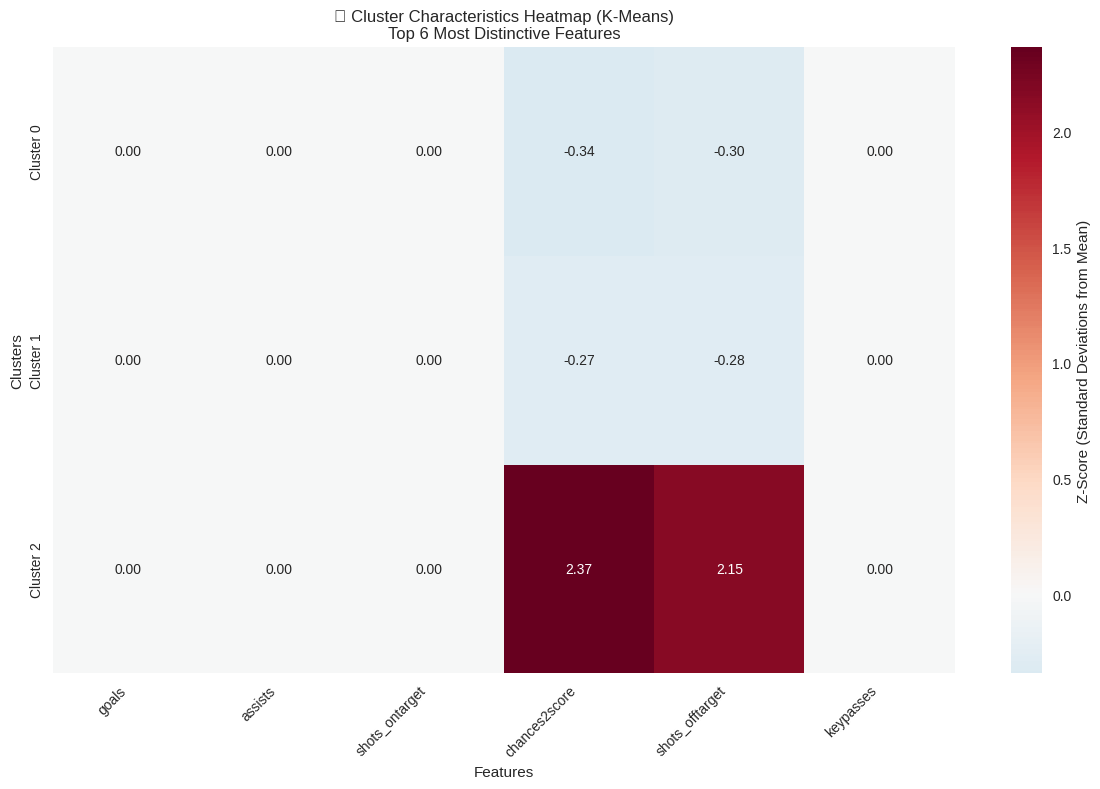


 Player Recommendation System:
Based on the clustering analysis, here's how to use these insights:

1. SCOUTING & RECRUITMENT:
 - Identify which cluster represents your target player type
 - Use cluster characteristics to set scouting criteria
 - Compare potential signings against cluster profiles

2. 🏃 TEAM BALANCE:
 - Ensure your squad has players from different clusters
 - Identify gaps in your current roster
 - Plan formations based on available player types

3. PLAYER DEVELOPMENT:
 - Understand each player's natural profile
 - Set development goals to move players between clusters
 - Focus training on improving cluster-specific weaknesses

4. 💰 MARKET VALUE ANALYSIS:
 - Compare player market values within clusters
 - Identify undervalued players in each cluster
 - Set realistic transfer targets based on cluster analysis

 Saving clustering results...
 Results saved to: /home/malekipourdev/projects/ml-football/data/player_clusters.csv

 CLUSTERING ANALYSIS COMPLETE!
 Total players

""
16
17
18
72
91
92
93
94
118
119


In [16]:
# Player Profile Analysis
print(" Player Profile Analysis")
print("="*80)

# Use the best clustering method for detailed analysis
best_labels = clustering_methods[best_method]['labels']
best_cluster_column = f'{best_method}_Cluster'

print(f" Analyzing player profiles using {best_method} clustering")
print(f" Total clusters: {clustering_methods[best_method]['n_clusters']}")

# Create detailed cluster profiles
cluster_profiles = {}

# Get all available features for profiling
all_features = [col for col in df_clustering.columns if col not in ['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'GMM_Max_Probability']]

for cluster_id in np.unique(best_labels):
 if cluster_id == -1: # Skip noise points
 continue
 
 cluster_mask = best_labels == cluster_id
 cluster_data = df_clustering[cluster_mask]
 
 # Calculate statistics
 profile = {
 'size': len(cluster_data),
 'percentage': (len(cluster_data) / len(df_clustering)) * 100,
 'features': {}
 }
 
 # Analyze each feature
 for feature in all_features:
 if feature in df_clustering.columns:
 cluster_mean = cluster_data[feature].mean()
 overall_mean = df_clustering[feature].mean()
 cluster_std = cluster_data[feature].std()
 
 profile['features'][feature] = {
 'mean': cluster_mean,
 'std': cluster_std,
 'deviation_from_overall': ((cluster_mean - overall_mean) / overall_mean) * 100,
 'relative_strength': 'High' if cluster_mean > overall_mean else 'Low'
 }
 
 cluster_profiles[cluster_id] = profile

# Display cluster profiles
print(f"\n Detailed Cluster Profiles:")
print("="*80)

for cluster_id, profile in cluster_profiles.items():
 print(f"\n CLUSTER {cluster_id} - {profile['size']} players ({profile['percentage']:.1f}%)")
 print("-" * 60)
 
 # Find the most distinctive features (highest absolute deviation)
 feature_deviations = []
 for feature, stats in profile['features'].items():
 deviation = abs(stats['deviation_from_overall'])
 feature_deviations.append((feature, stats, deviation))
 
 # Sort by deviation and show top features
 feature_deviations.sort(key=lambda x: x[2], reverse=True)
 
 print(" Key Characteristics (Top 5 distinctive features):")
 for i, (feature, stats, deviation) in enumerate(feature_deviations[:5]):
 direction = "" if stats['deviation_from_overall'] > 0 else ""
 strength = stats['relative_strength']
 print(f" {i+1}. {feature}: {stats['mean']:.2f} {direction} ({stats['deviation_from_overall']:+.1f}% vs avg) - {strength}")
 
 # Suggest player type based on characteristics
 top_features = [item[0] for item in feature_deviations[:3]]
 print(f"\n Suggested Player Type: Based on {', '.join(top_features[:2])}")

# Create visualization of cluster characteristics
print(f"\n Visualizing cluster characteristics...")

# Select top distinguishing features across all clusters
all_deviations = {}
for cluster_id, profile in cluster_profiles.items():
 for feature, stats in profile['features'].items():
 if feature not in all_deviations:
 all_deviations[feature] = []
 all_deviations[feature].append(abs(stats['deviation_from_overall']))

# Get features with highest average deviation
avg_deviations = {feature: np.mean(deviations) for feature, deviations in all_deviations.items()}
top_features = sorted(avg_deviations.items(), key=lambda x: x[1], reverse=True)[:6]
selected_features = [feature for feature, _ in top_features]

# Create heatmap of cluster characteristics
cluster_matrix = []
cluster_labels_list = []

for cluster_id, profile in cluster_profiles.items():
 row = []
 for feature in selected_features:
 if feature in profile['features']:
 # Use z-score for better comparison
 cluster_mean = profile['features'][feature]['mean']
 overall_mean = df_clustering[feature].mean()
 overall_std = df_clustering[feature].std()
 z_score = (cluster_mean - overall_mean) / overall_std if overall_std > 0 else 0
 row.append(z_score)
 else:
 row.append(0)
 cluster_matrix.append(row)
 cluster_labels_list.append(f'Cluster {cluster_id}')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_matrix, 
 xticklabels=selected_features,
 yticklabels=cluster_labels_list,
 annot=True,
 fmt='.2f',
 cmap='RdBu_r',
 center=0,
 cbar_kws={'label': 'Z-Score (Standard Deviations from Mean)'})

plt.title(f' Cluster Characteristics Heatmap ({best_method})\nTop {len(selected_features)} Most Distinctive Features')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create player recommendation system
print(f"\n Player Recommendation System:")
print("="*80)

print("Based on the clustering analysis, here's how to use these insights:")
print("\n1. SCOUTING & RECRUITMENT:")
print(" - Identify which cluster represents your target player type")
print(" - Use cluster characteristics to set scouting criteria")
print(" - Compare potential signings against cluster profiles")

print("\n2. 🏃 TEAM BALANCE:")
print(" - Ensure your squad has players from different clusters")
print(" - Identify gaps in your current roster")
print(" - Plan formations based on available player types")

print("\n3. PLAYER DEVELOPMENT:")
print(" - Understand each player's natural profile")
print(" - Set development goals to move players between clusters")
print(" - Focus training on improving cluster-specific weaknesses")

print("\n4. 💰 MARKET VALUE ANALYSIS:")
print(" - Compare player market values within clusters")
print(" - Identify undervalued players in each cluster")
print(" - Set realistic transfer targets based on cluster analysis")

# Save clustering results
print(f"\n Saving clustering results...")
output_file = '/home/malekipourdev/projects/ml-football/data/player_clusters.csv'
df_clustering.to_csv(output_file, index=False)
print(f" Results saved to: {output_file}")

# Final summary
print(f"\n CLUSTERING ANALYSIS COMPLETE!")
print("="*80)
print(f" Total players analyzed: {len(df_clustering)}")
print(f" Best clustering method: {best_method}")
print(f" Number of clusters: {clustering_methods[best_method]['n_clusters']}")
print(f" Silhouette Score: {clustering_methods[best_method]['silhouette']:.4f}")
print(f" Results saved for further analysis")

print(f"\n Next Steps:")
print(" 1. Use cluster labels for tactical analysis")
print(" 2. Integrate with performance data")
print(" 3. Build predictive models based on clusters")
print(" 4. Create automated scouting reports")
print(" 5. Develop cluster-specific training programs")

print(f"\n Key Insights:")
for cluster_id, profile in cluster_profiles.items():
 top_feature = max(profile['features'].items(), key=lambda x: abs(x[1]['deviation_from_overall']))
 feature_name, feature_stats = top_feature
 print(f" Cluster {cluster_id}: Specialized in {feature_name} ({profile['size']} players)")

print(f"\n✨ Happy clustering! Your football analytics journey continues...")

# Display sample of final dataset
print(f"\n Sample of Final Dataset with Clusters:")
print("="*80)
sample_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality', f'{best_method}_Cluster']
available_columns = [col for col in sample_columns if col in df_clustering.columns]
display(df_clustering[available_columns].head(10))

# Football Player Clustering Analysis

## Project Goal: Discovering Player Types Through Unsupervised Learning

In this project, we will use clustering algorithms to discover natural groups of football players based on their playing style and performance characteristics. This can help:

- **Identify Player Types**: Discover different playing styles (e.g., defensive, attacking, creative)
- **Scout Similar Players**: Find players with similar characteristics for recruitment
- **Position Analysis**: Understand how positions relate to playing styles
- 🧠 **Tactical Insights**: Help coaches understand team composition

### Clustering Approaches We'll Explore:
- **K-Means**: Partition players into k clusters
- **Hierarchical Clustering**: Build cluster dendrograms
- **DBSCAN**: Find density-based clusters
- **Gaussian Mixture Models**: Probabilistic clustering
- **PCA + Clustering**: Dimensionality reduction first